In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

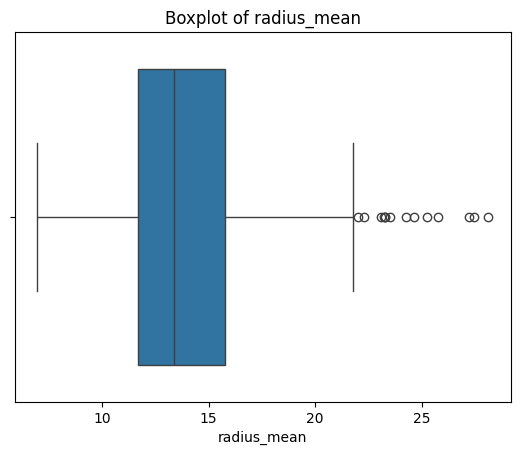

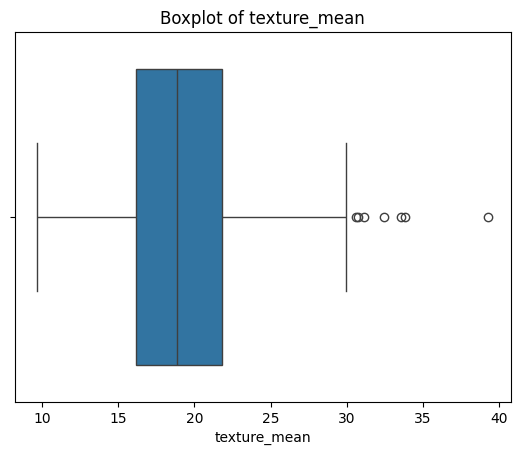

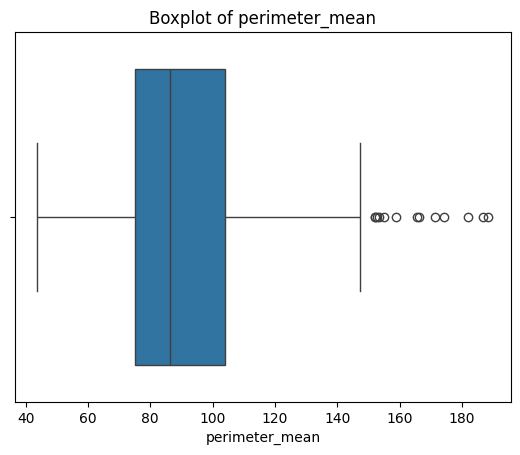

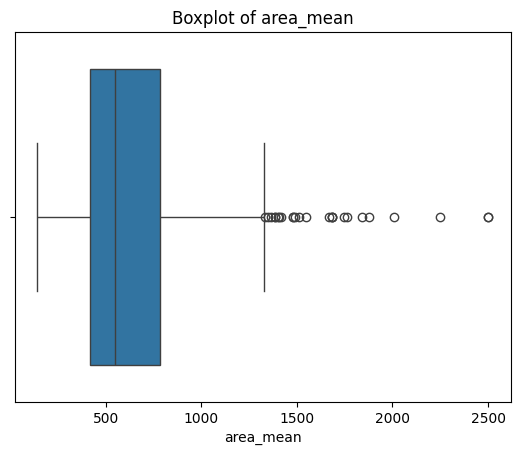

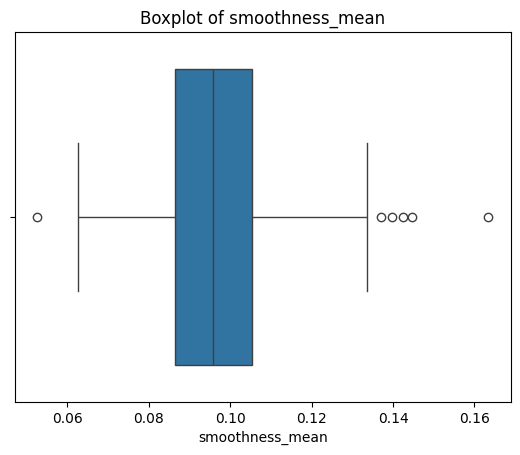

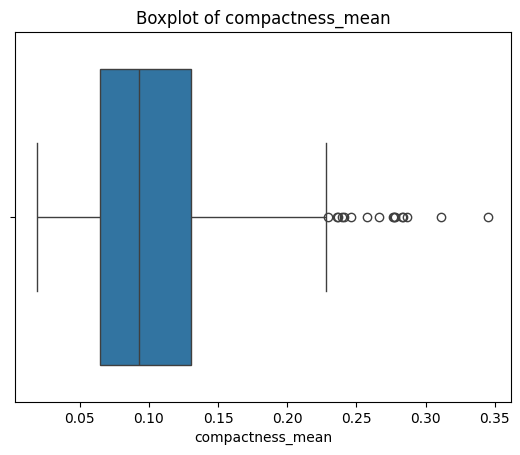

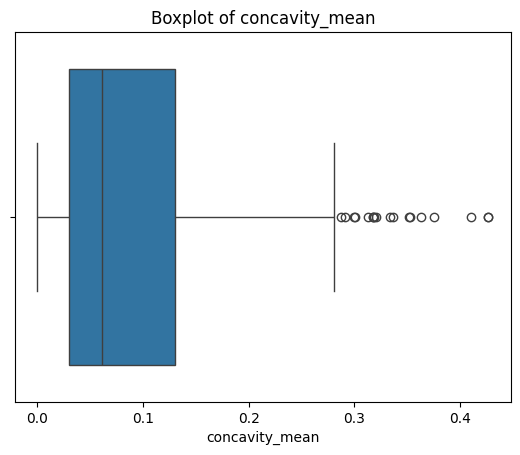

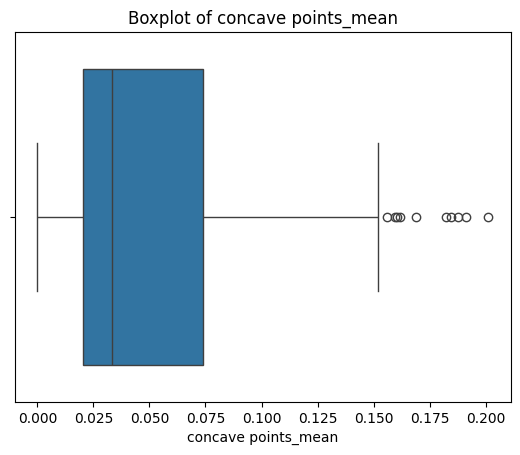

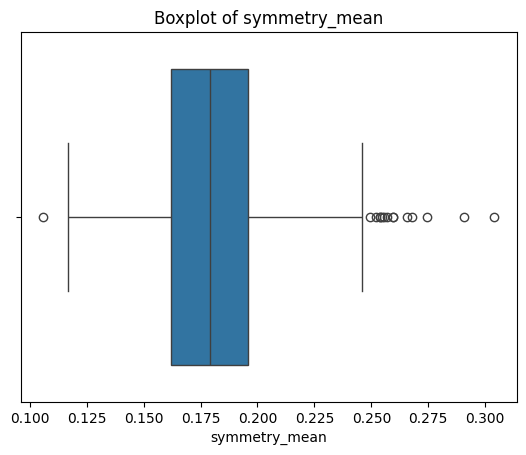

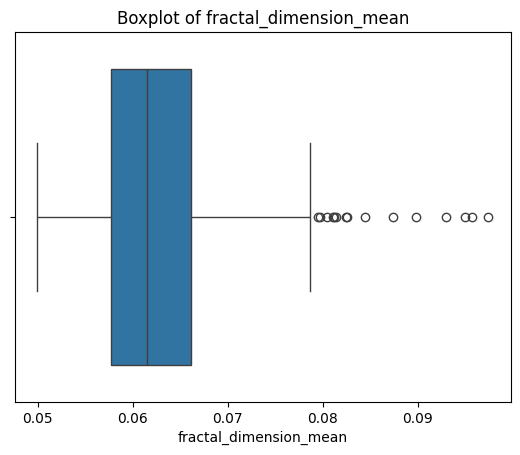

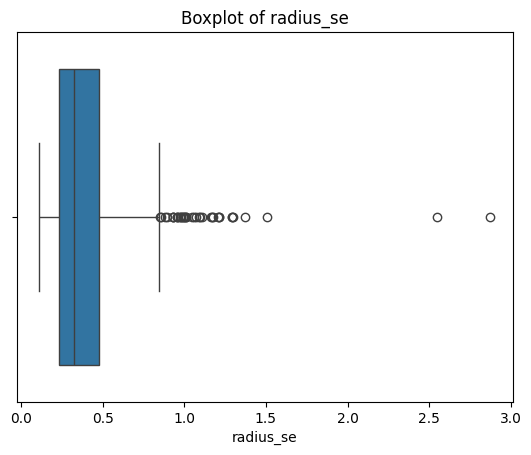

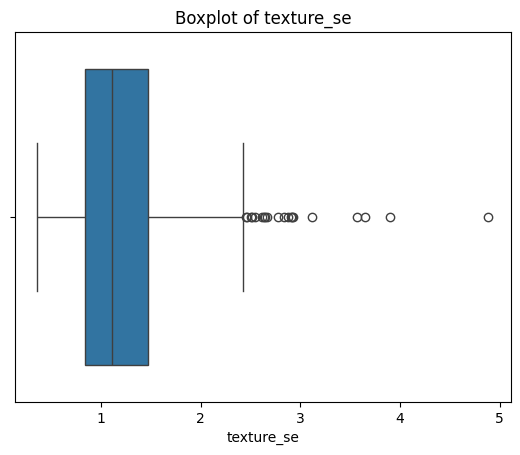

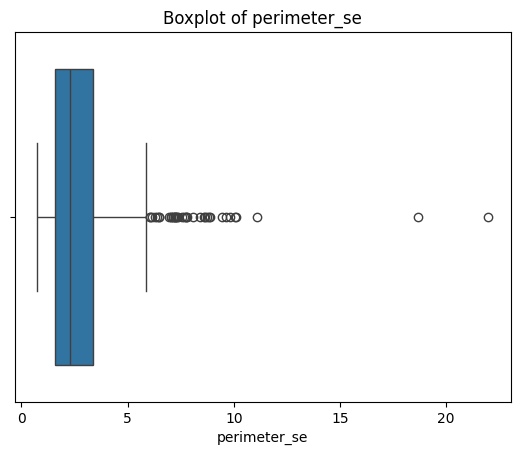

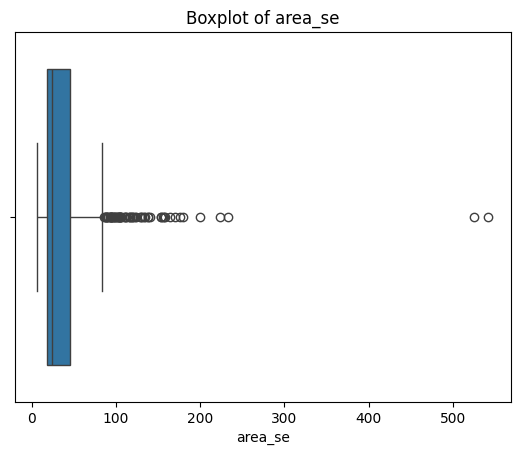

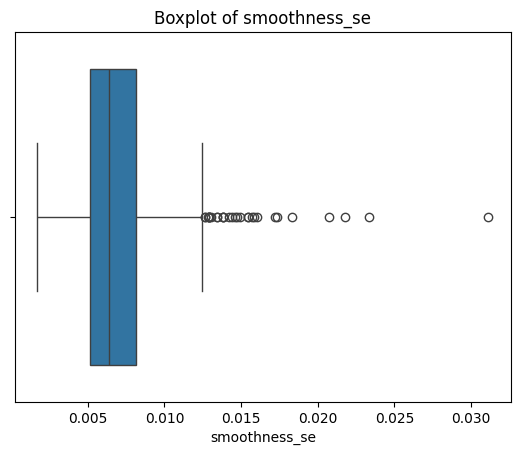

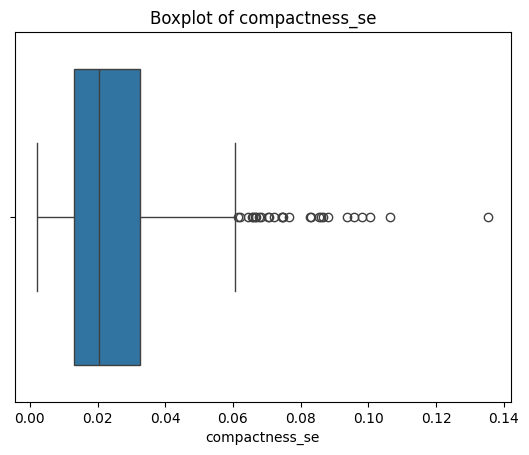

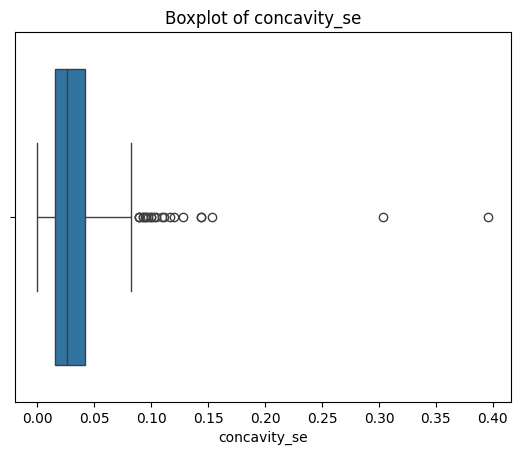

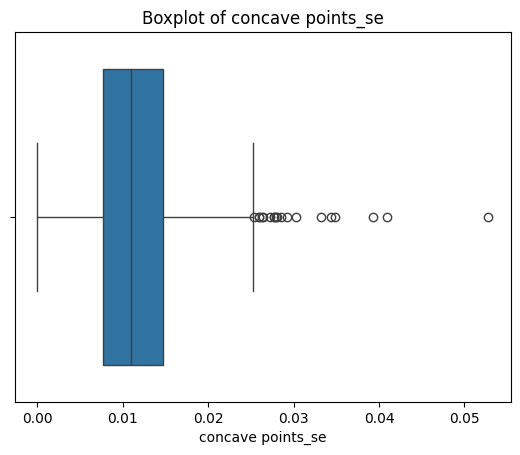

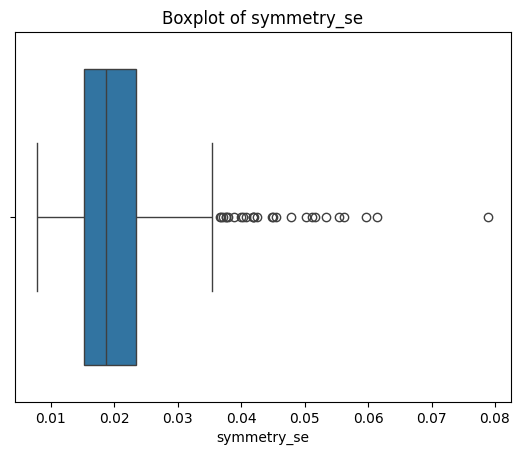

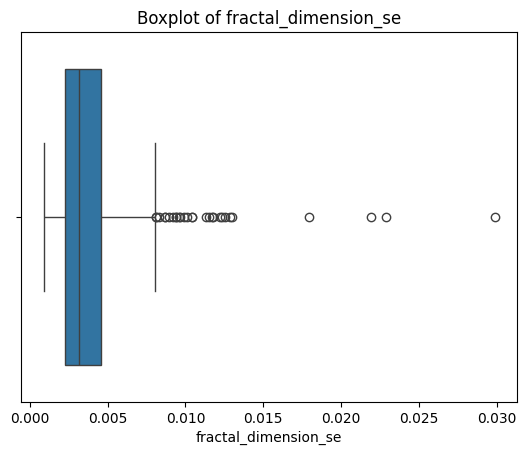

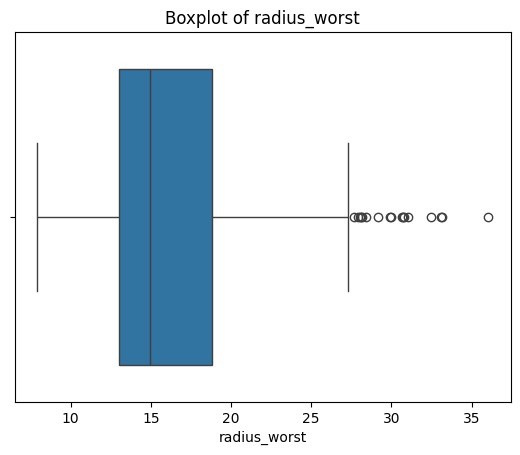

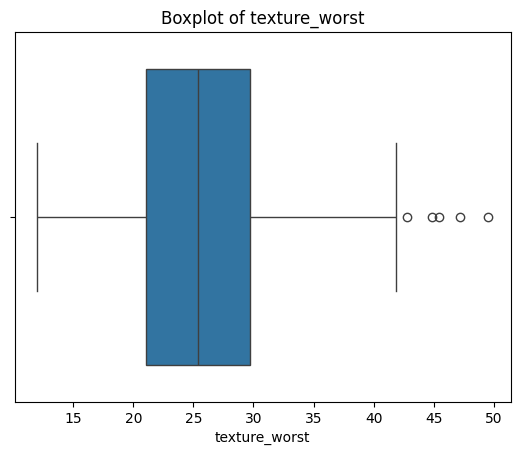

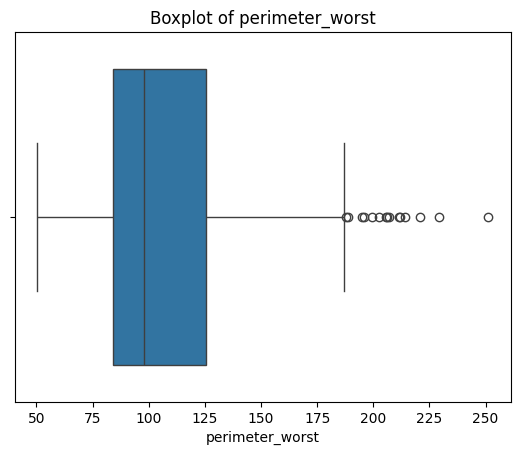

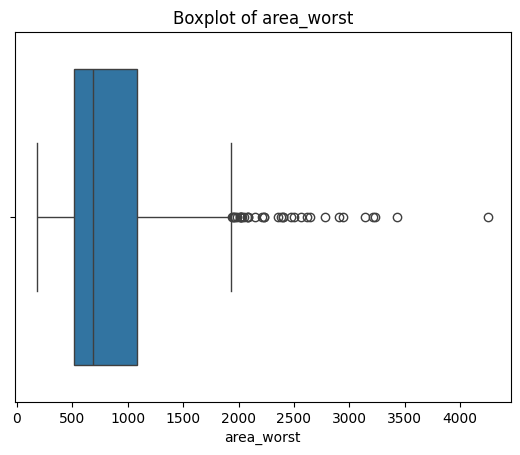

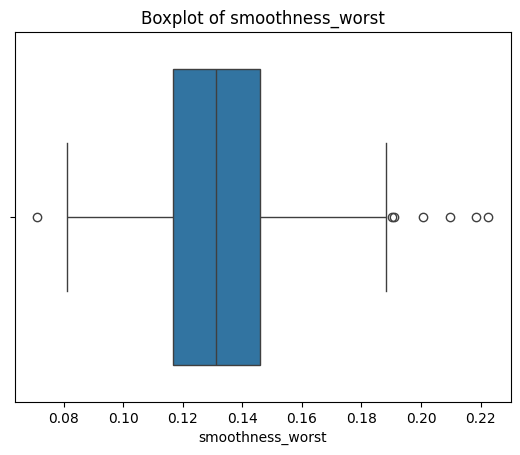

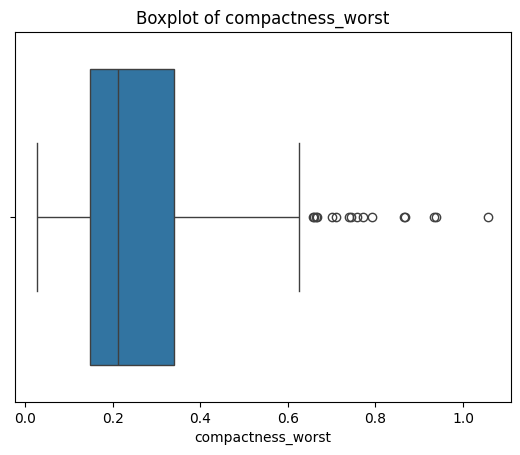

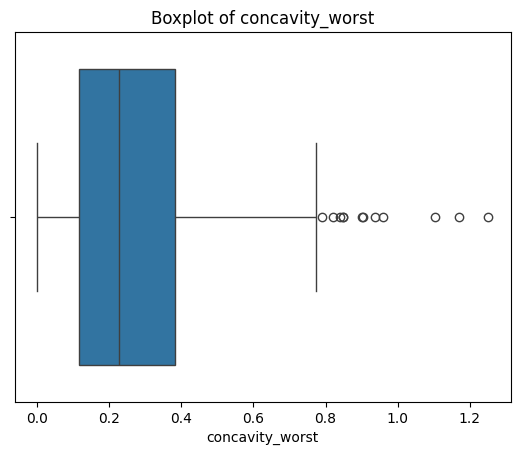

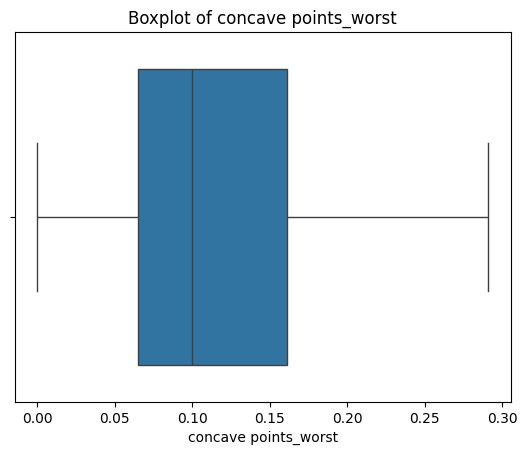

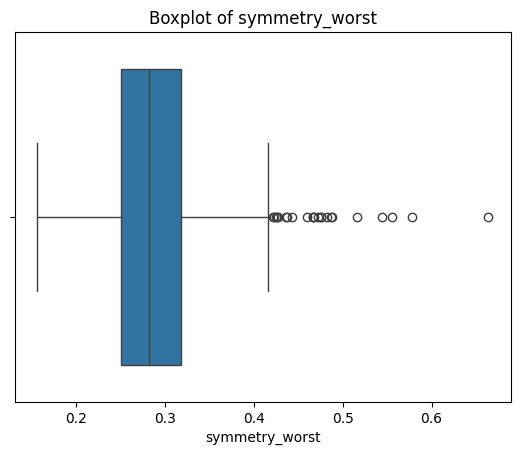

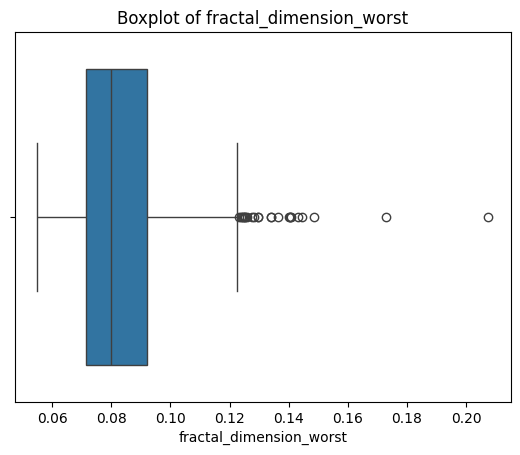

In [12]:
#checking for outliers
def plot_boxplots(data, columns=None):
    # If columns not specified, use all columns except diagnosis'
    if columns is None:
        columns = [col for col in data.columns if col not in ['diagnosis']]
    
    for column in columns:
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

plot_boxplots(data)

In [13]:
def count_outliers(data, columns=None):
    # If columns not specified, use all columns except diagnosis'
    if columns is None:
        columns = [col for col in data.columns if col not in ['diagnosis']]
    
    outlier_counts = {}
    all_outlier_rows = set()
    
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
        all_outlier_rows.update(outliers.index)
    
    return outlier_counts, all_outlier_rows


outlier_counts, outlier_rows = count_outliers(data)

for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")

radius_mean: 14 outliers
texture_mean: 7 outliers
perimeter_mean: 13 outliers
area_mean: 25 outliers
smoothness_mean: 6 outliers
compactness_mean: 16 outliers
concavity_mean: 18 outliers
concave points_mean: 10 outliers
symmetry_mean: 15 outliers
fractal_dimension_mean: 15 outliers
radius_se: 38 outliers
texture_se: 20 outliers
perimeter_se: 38 outliers
area_se: 65 outliers
smoothness_se: 30 outliers
compactness_se: 28 outliers
concavity_se: 22 outliers
concave points_se: 19 outliers
symmetry_se: 27 outliers
fractal_dimension_se: 28 outliers
radius_worst: 17 outliers
texture_worst: 5 outliers
perimeter_worst: 15 outliers
area_worst: 35 outliers
smoothness_worst: 7 outliers
compactness_worst: 16 outliers
concavity_worst: 12 outliers
concave points_worst: 0 outliers
symmetry_worst: 23 outliers
fractal_dimension_worst: 24 outliers


In [14]:
print(f"\nTotal number of rows containing at least one outlier: {len(outlier_rows)}")
print(f"Percentage of dataset with outliers: {len(outlier_rows)/len(data)*100:.2f}%")


Total number of rows containing at least one outlier: 171
Percentage of dataset with outliers: 30.05%


<Axes: >

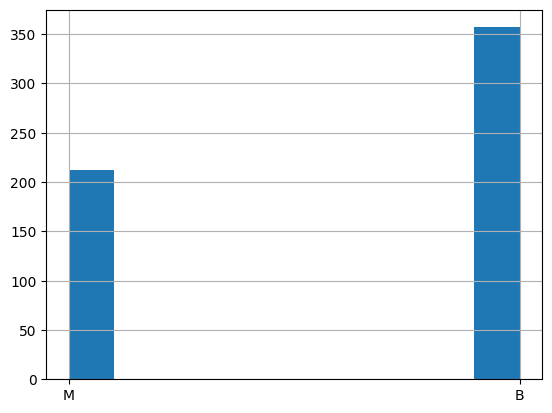

In [15]:
data["diagnosis"].hist()

In [16]:
def remove_outliers(data, columns=None):
    # Make a copy of the original data
    clean_data = data.copy()
    
    # If columns not specified, use all columns except diagnosis'
    if columns is None:
        columns = [col for col in data.columns if col not in ['diagnosis']]
    
    print(f"Original data shape: {data.shape}")
    
    # Keep track of rows to remove
    rows_to_drop = set()
    outlier_counts = {}
    
    for column in columns:
        Q1 = clean_data[column].quantile(0.25)
        Q3 = clean_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find indices of outliers
        outlier_indices = clean_data[(clean_data[column] < lower_bound) | 
                                    (clean_data[column] > upper_bound)].index
        
        # Add these indices to our set
        rows_to_drop.update(outlier_indices)
        
        # Count outliers per column
        outlier_counts[column] = len(outlier_indices)
    
    # Remove all rows with outliers
    clean_data = clean_data.drop(list(rows_to_drop))
    
    print(f"Number of rows with outliers: {len(rows_to_drop)}")
    print(f"Cleaned data shape: {clean_data.shape}")
    # print("\nOutliers per column:")
    # for column, count in outlier_counts.items():
    #     print(f"{column}: {count} outliers")
    
    return clean_data

# Call the function
clean_data = remove_outliers(data)

Original data shape: (569, 31)
Number of rows with outliers: 171
Cleaned data shape: (398, 31)


In [17]:
#Mapping the values in the Target Feature
#make the B 0 and the M 1 for the target feature 
data["diagnosis"].replace (["M", "B"], [1,0], inplace =True)

C:\Users\Maryl\AppData\Local\Temp\ipykernel_32980\2512708338.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["diagnosis"].replace (["M", "B"], [1,0], inplace =True)
C:\Users\Maryl\AppData\Local\Temp\ipykernel_32980\2512708338.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["diagnos

<Axes: >

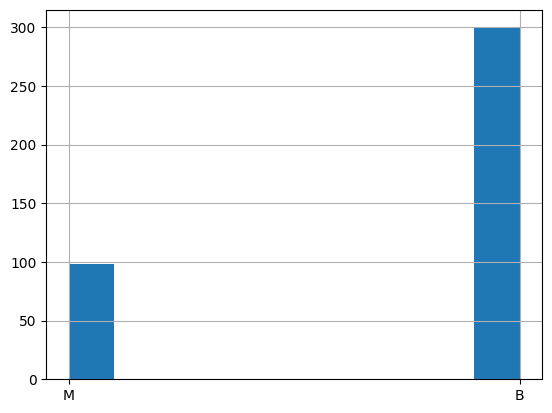

In [18]:
clean_data["diagnosis"].hist()

Removing the ouliers will remove the malignant rows, I will keep the outliers.

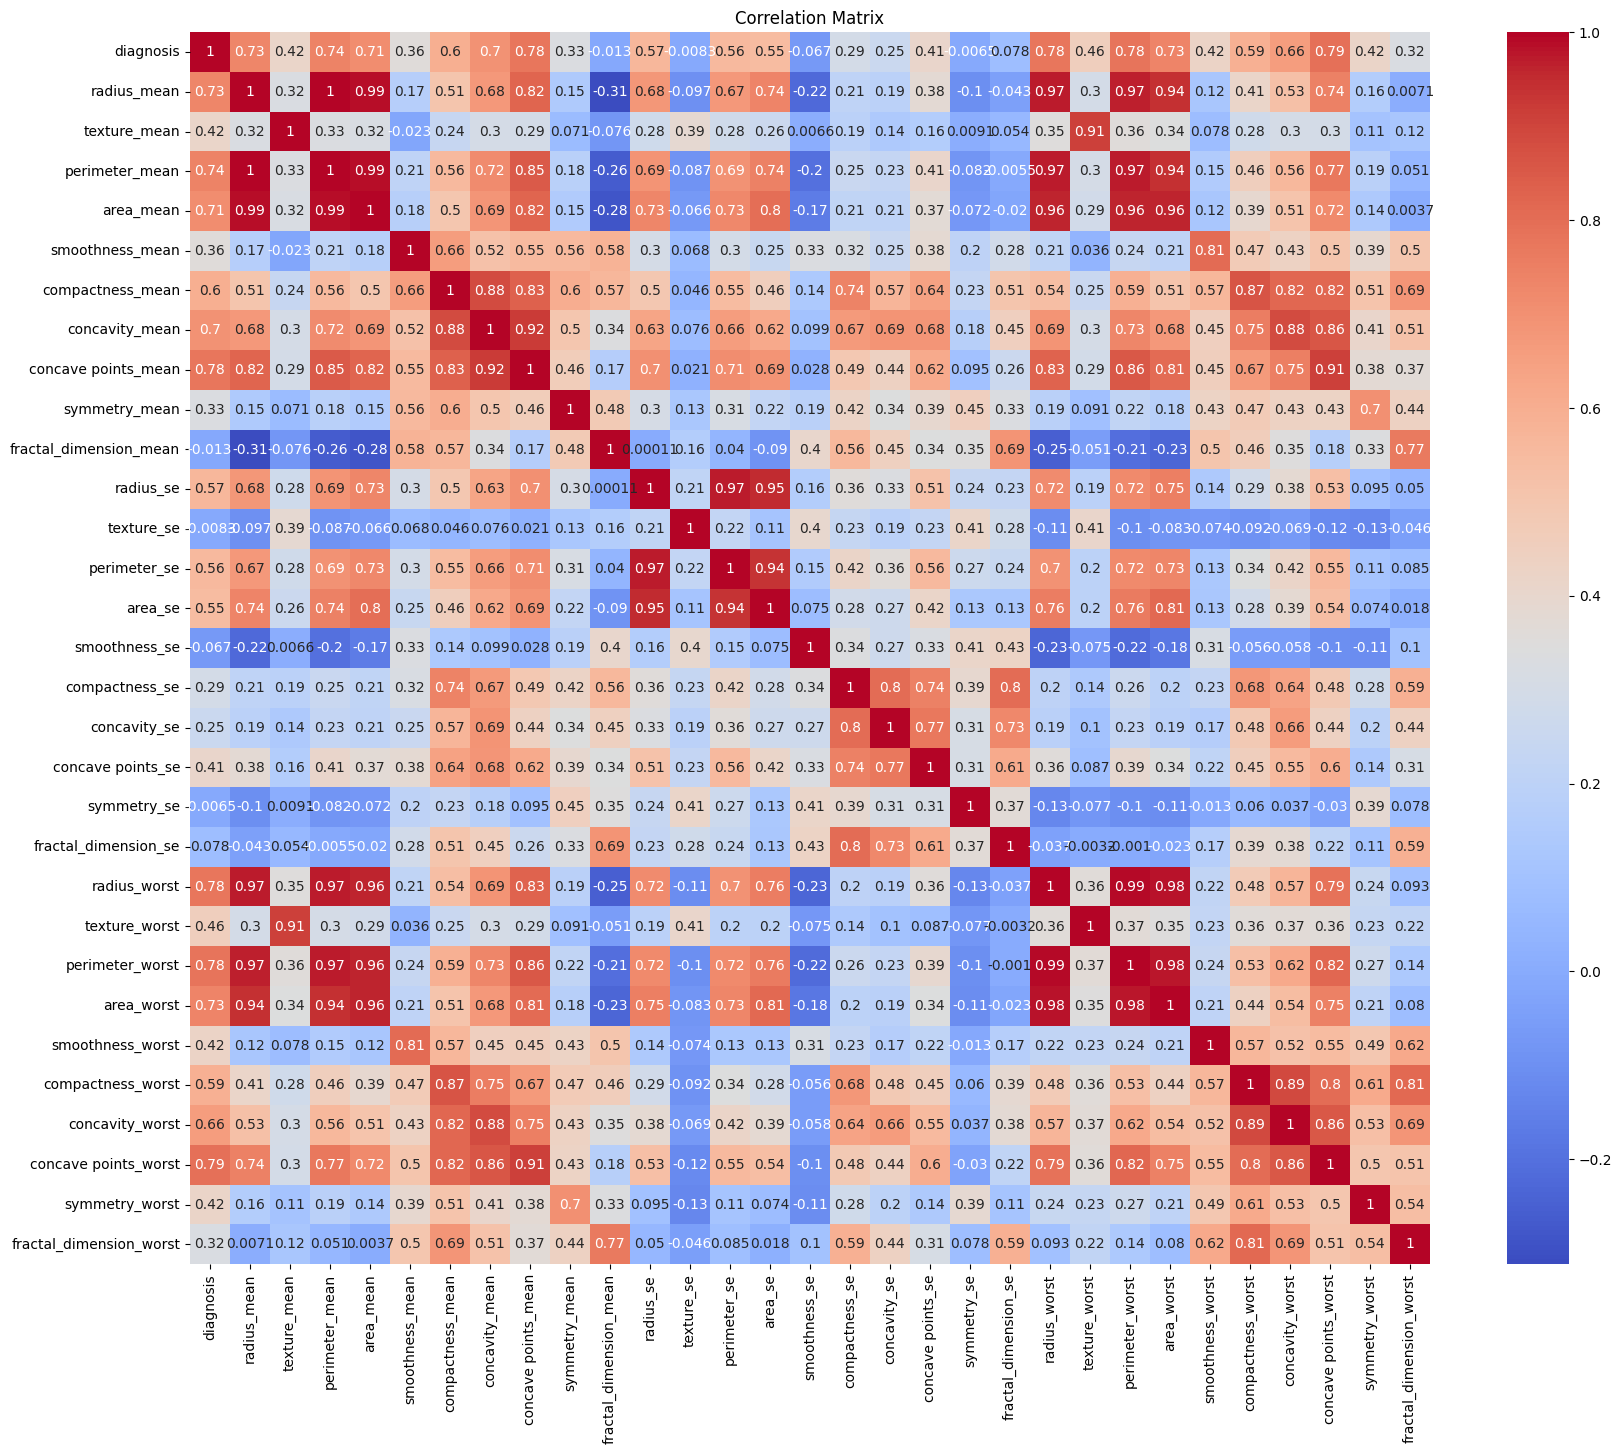

In [19]:
#Correlation Matix
matrix = data.corr()

# axis_corr = sns.heatmap(
#     data,
#     vmin = -1, vmax = 1, center =0,
#     cmap=sns.diverging_palette(50, 500, n=500),
#     square=True
# )
# plt.show()

dataframe = pd. DataFrame(data=data, columns=data.columns)
matrix = dataframe.corr()
plt.figure(figsize=(20,16))
sns.heatmap(matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

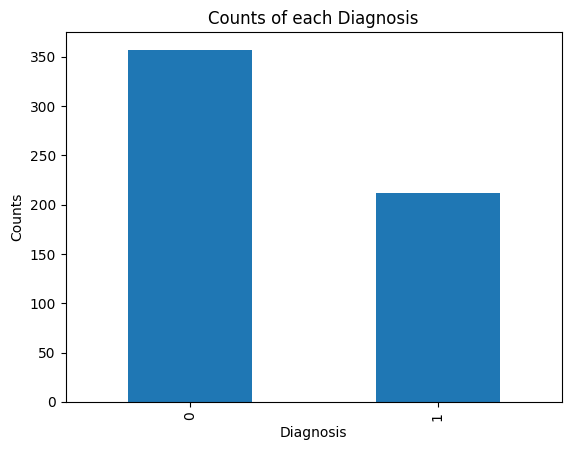

In [20]:
#bar plots for the target feature
diagnosis_counts = data["diagnosis"].value_counts()
diagnosis_counts


diagnosis_counts.plot(kind = "bar")
plt.title( "Counts of each Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Counts")
plt.show()

In [21]:
data["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

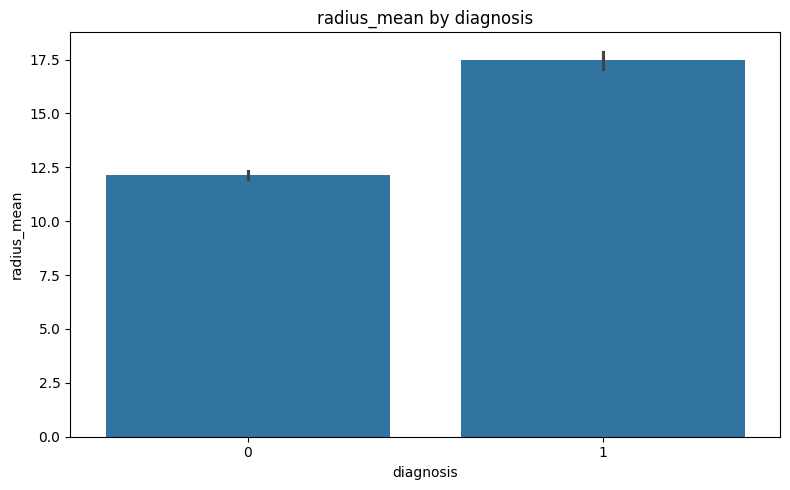

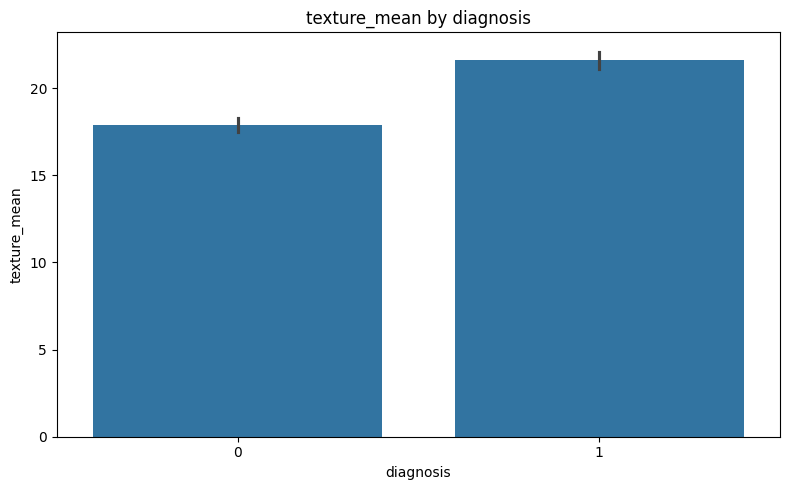

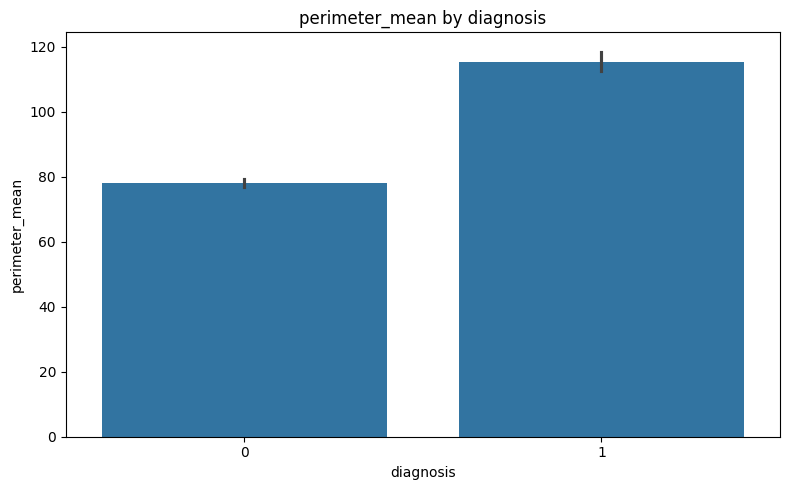

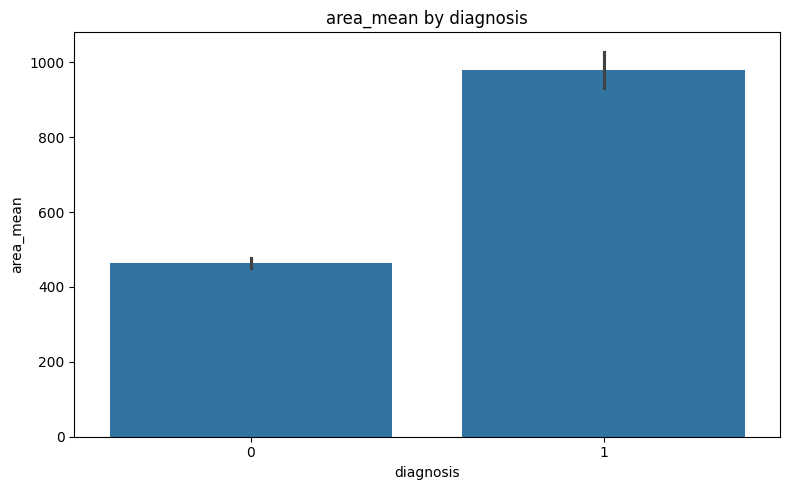

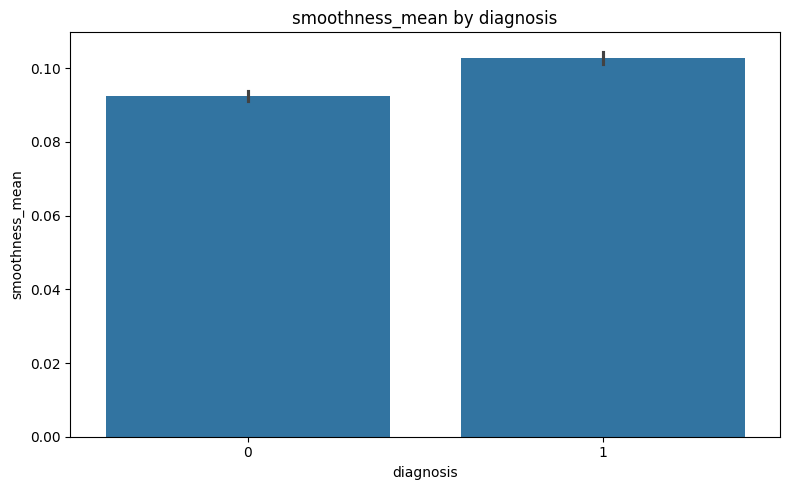

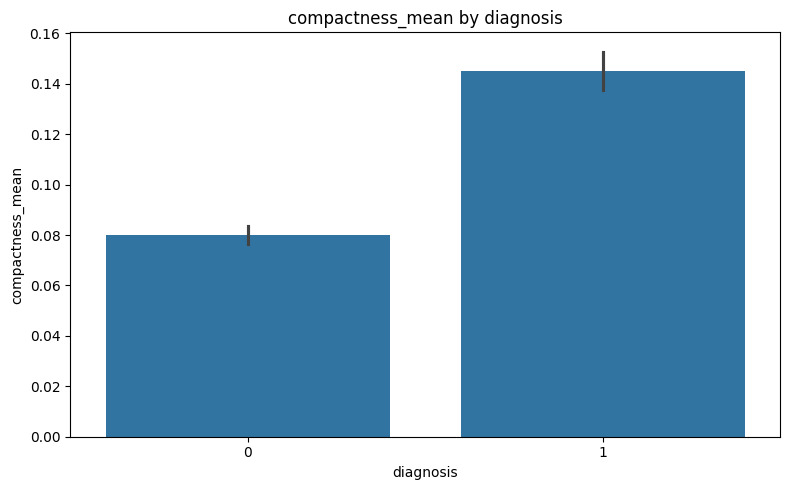

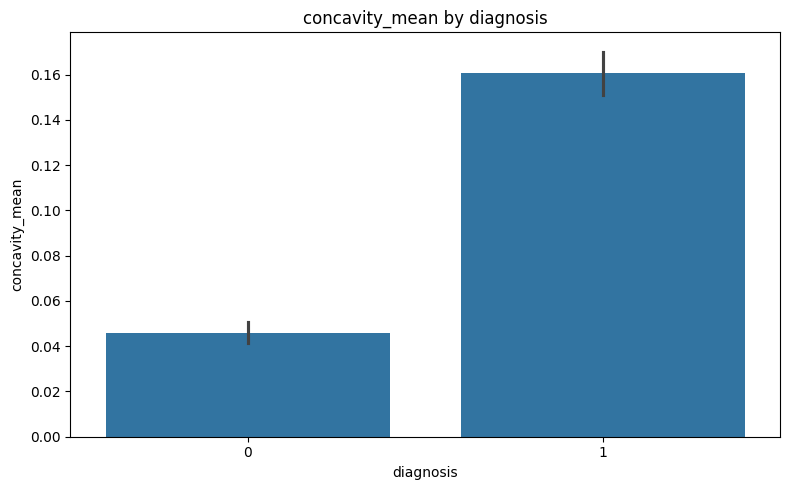

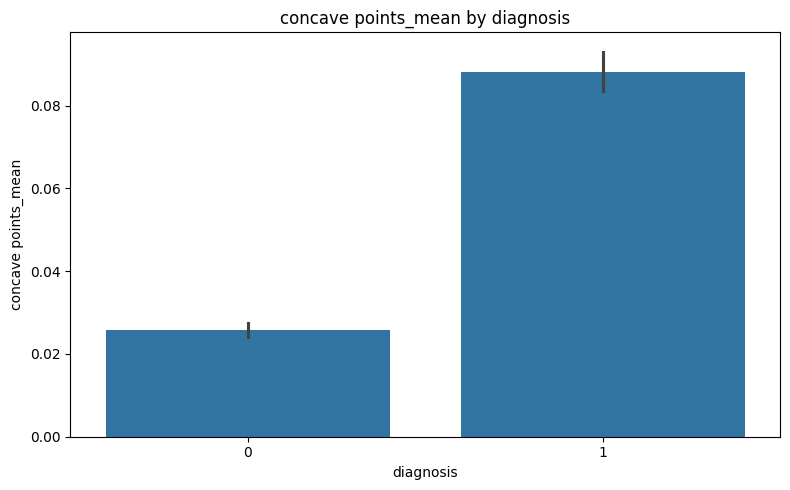

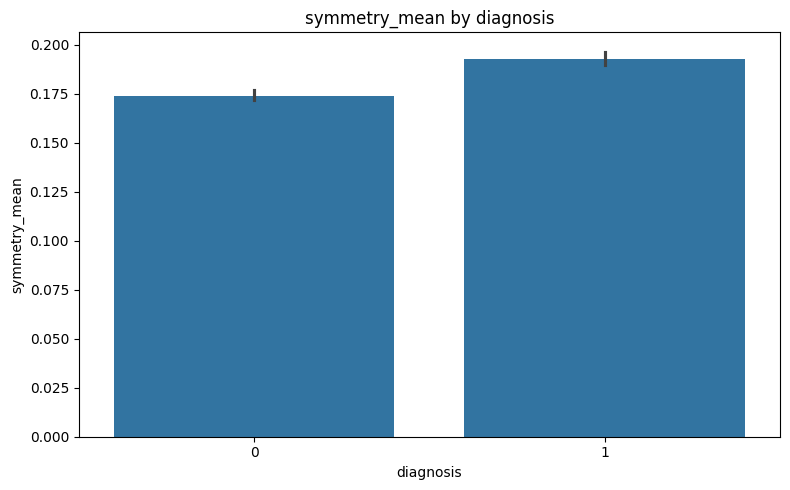

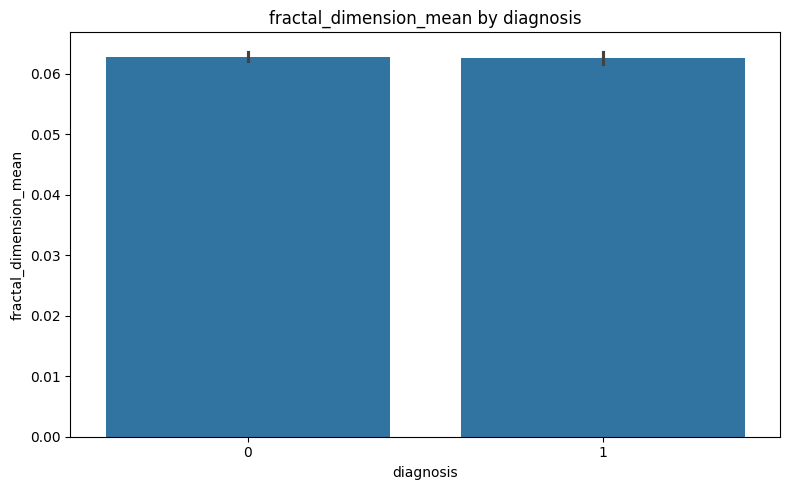

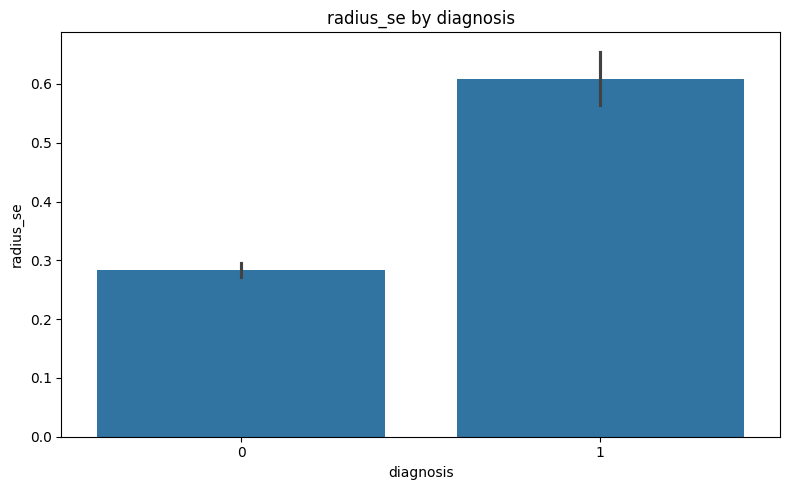

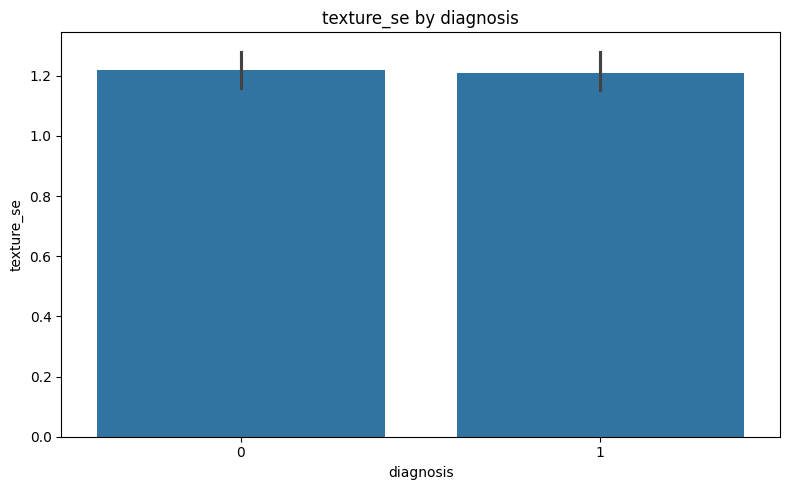

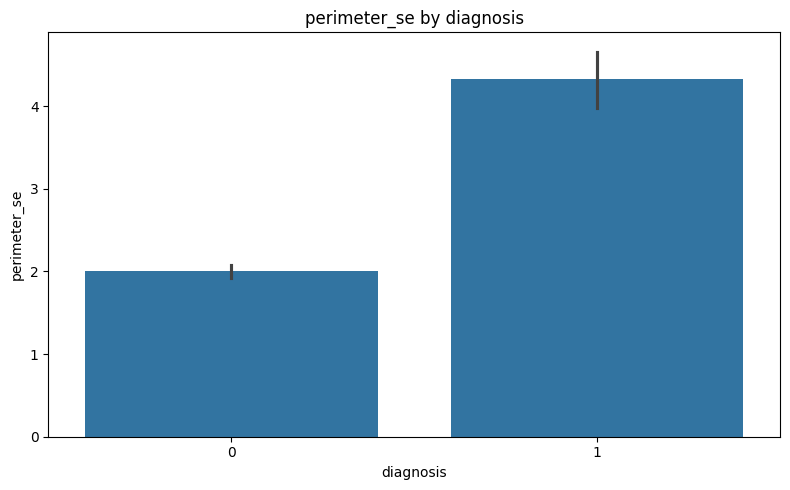

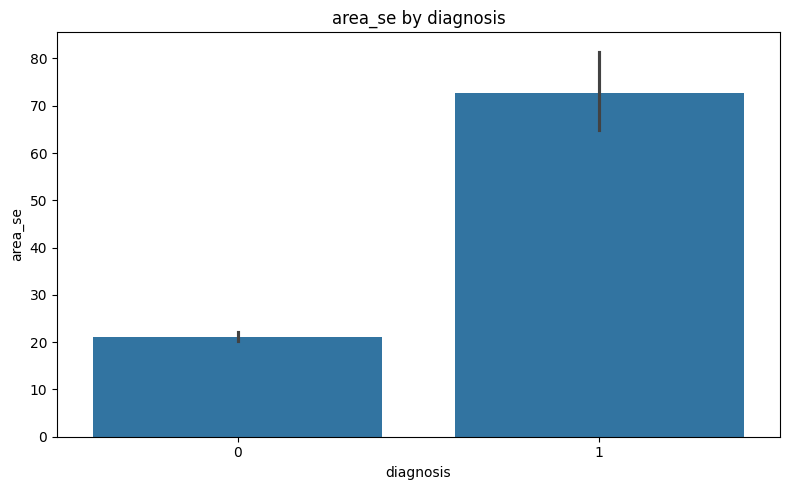

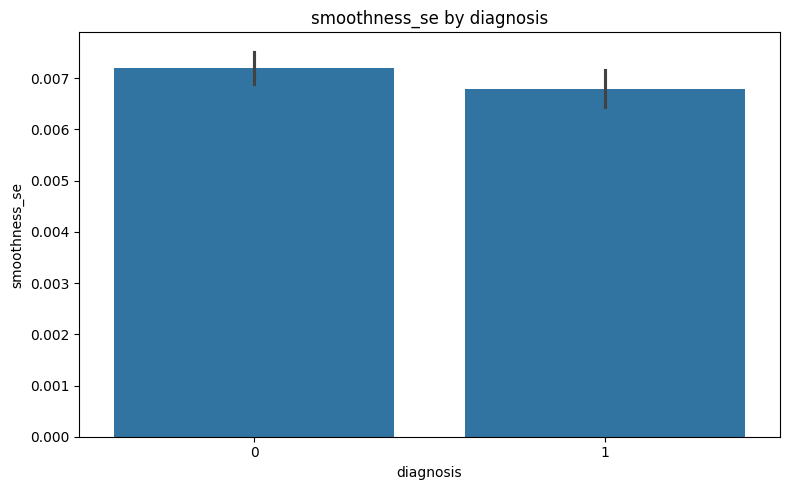

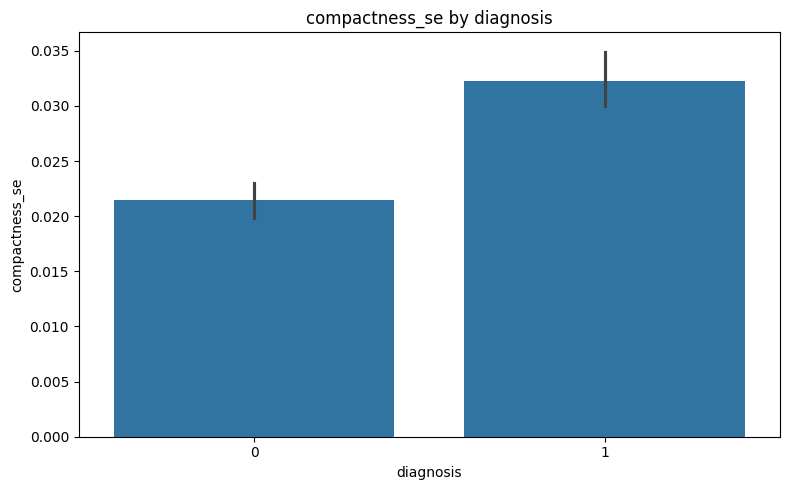

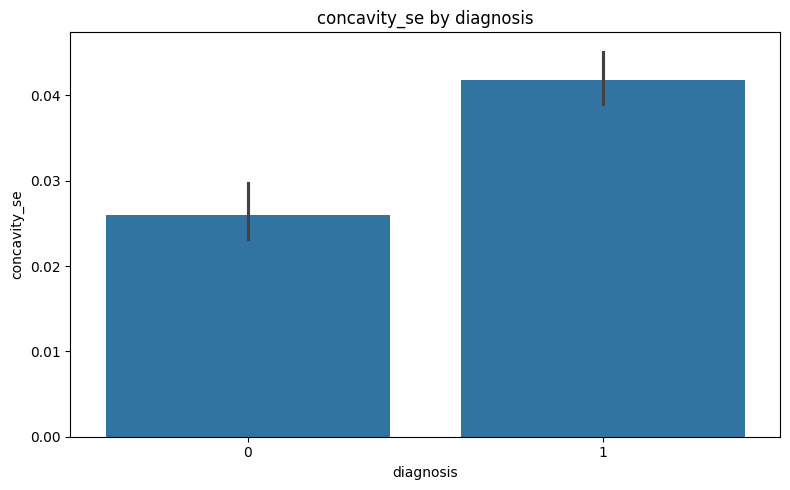

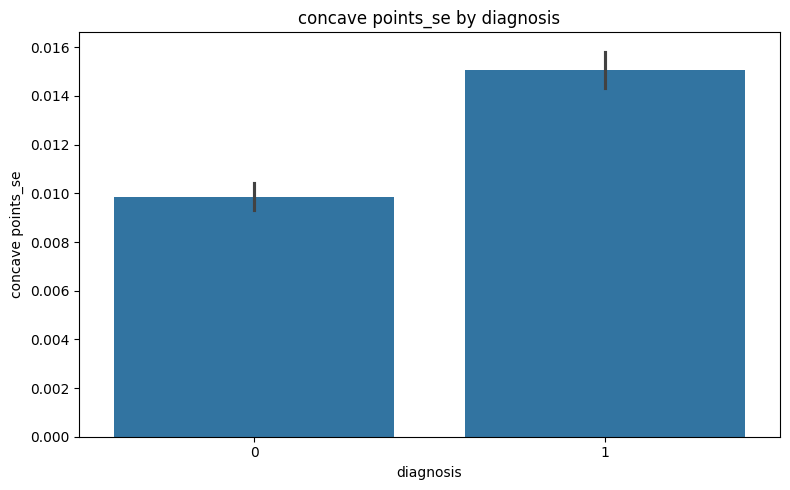

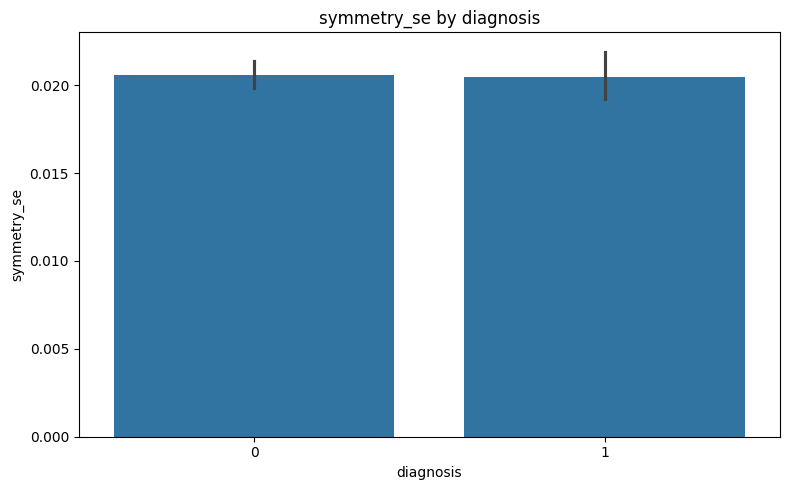

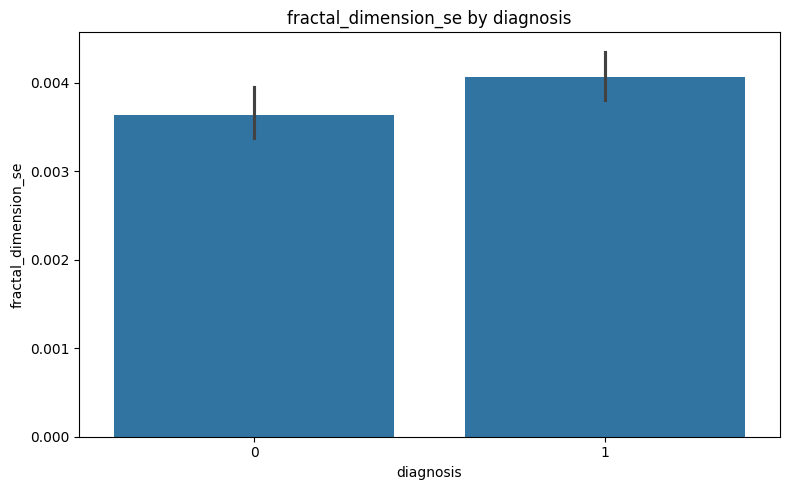

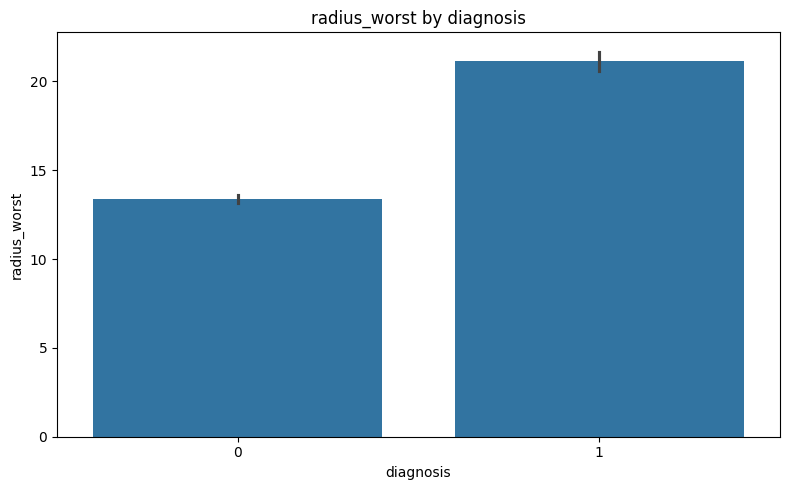

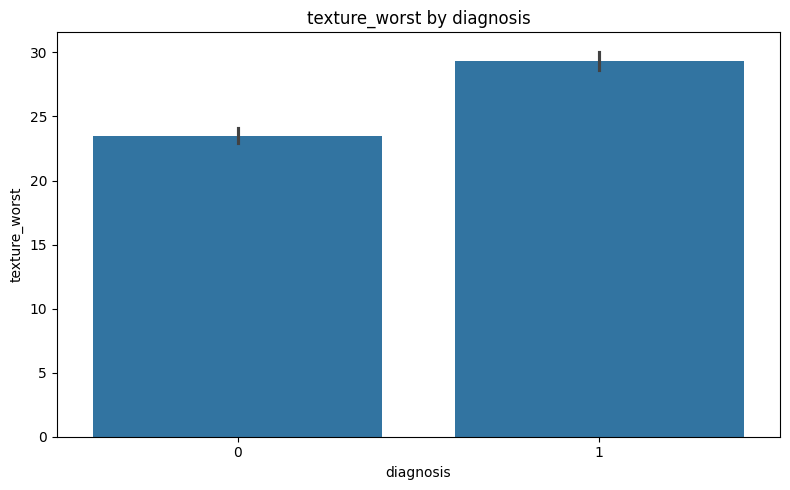

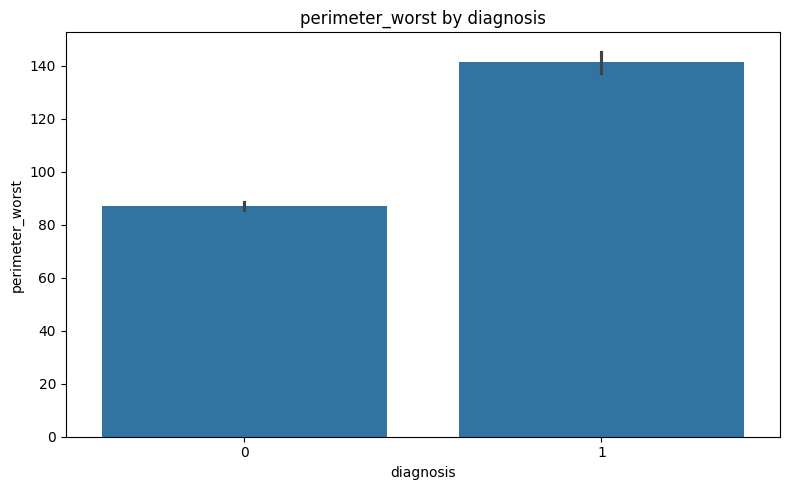

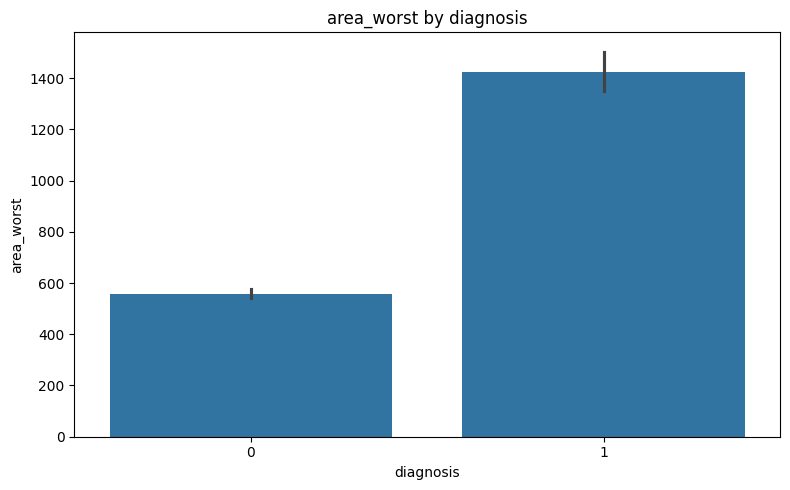

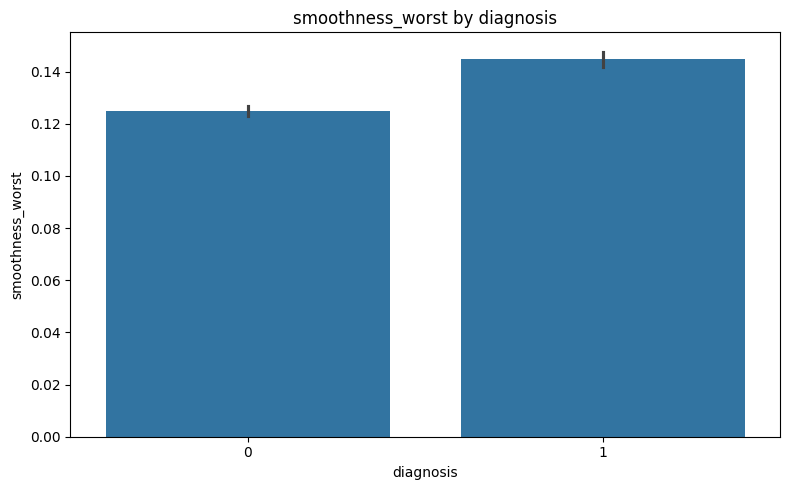

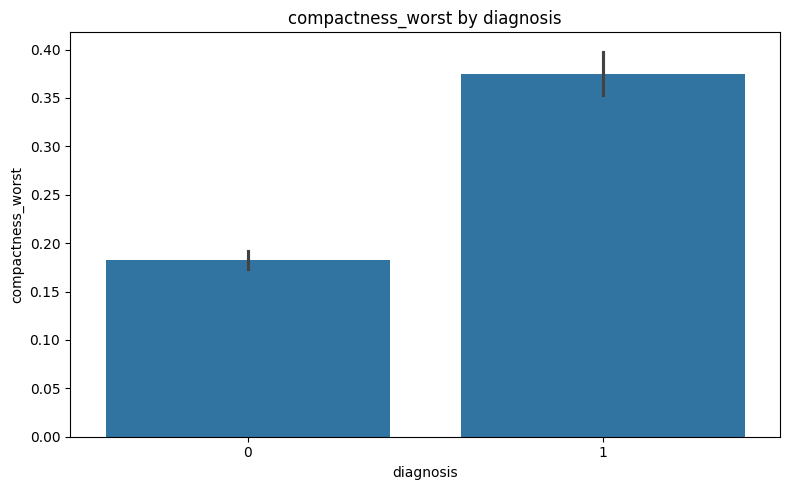

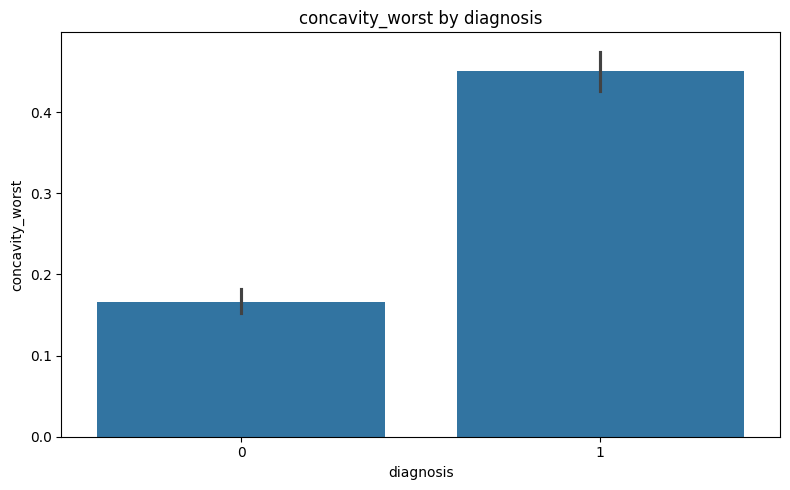

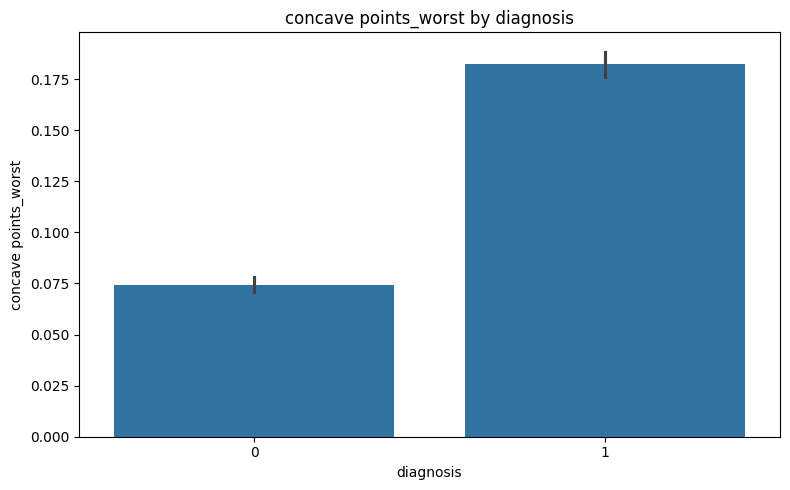

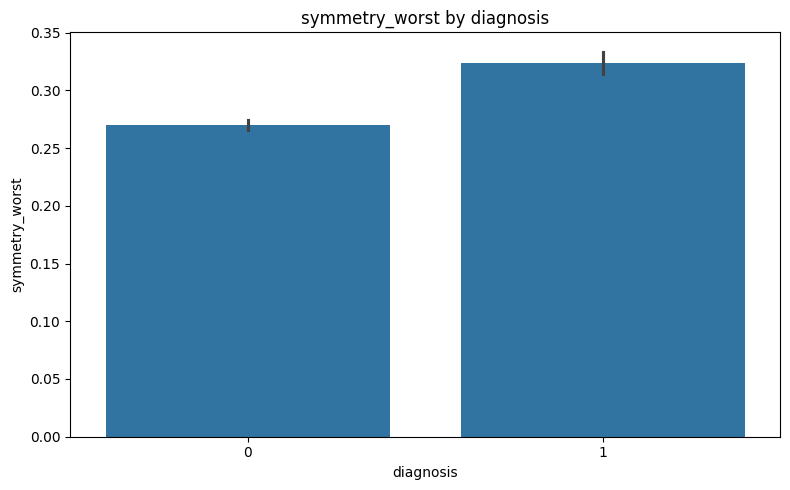

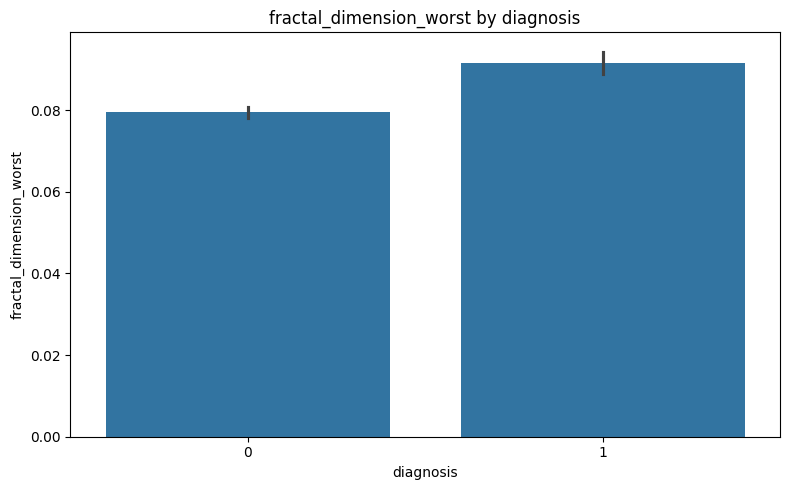

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'diagnosis' is your target column
target = 'diagnosis'  # Replace with your actual target column name

# Get all feature columns (excluding the target)
features = [col for col in data.columns if col != target]

# Create bar plots for each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=target, y=feature, data=data)
    plt.title(f"{feature} by {target}")
    plt.tight_layout()
    plt.show()

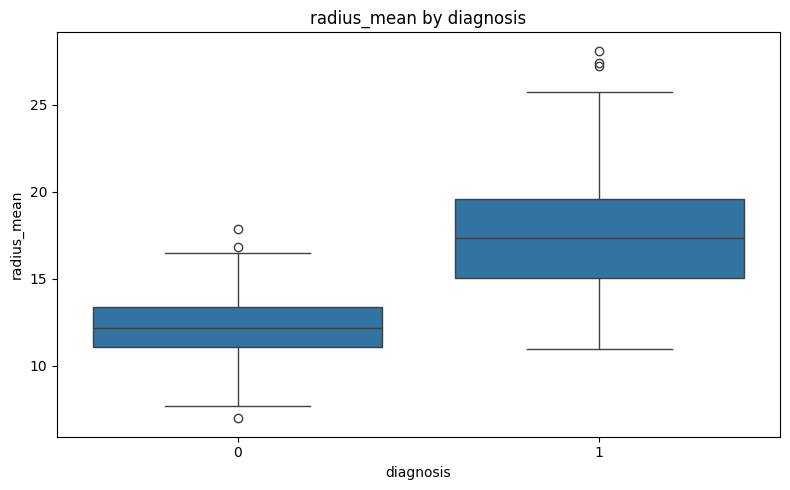

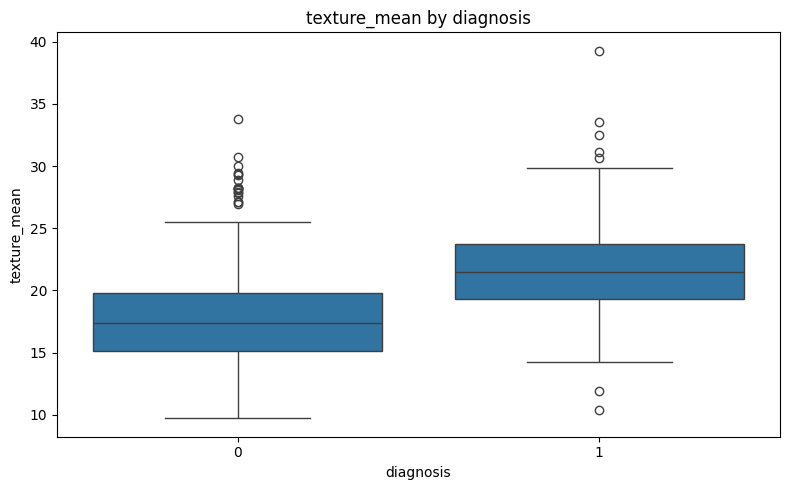

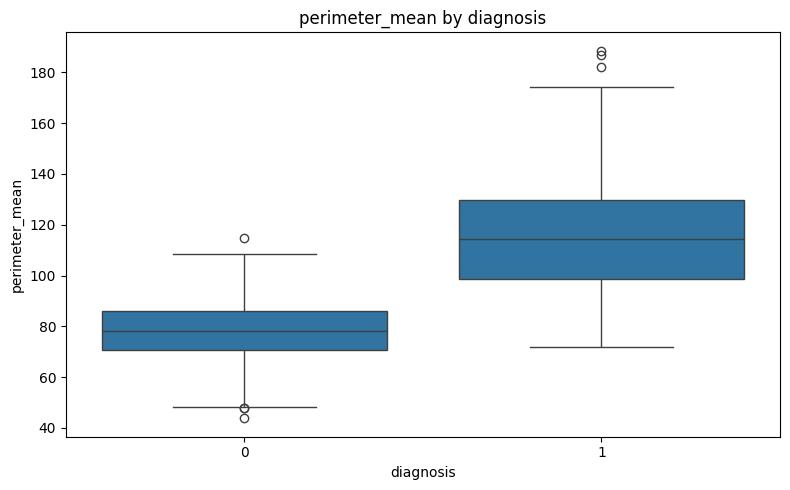

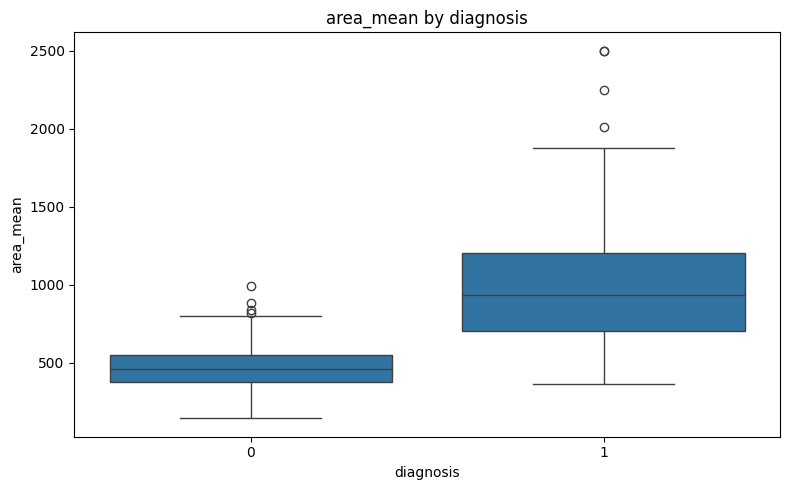

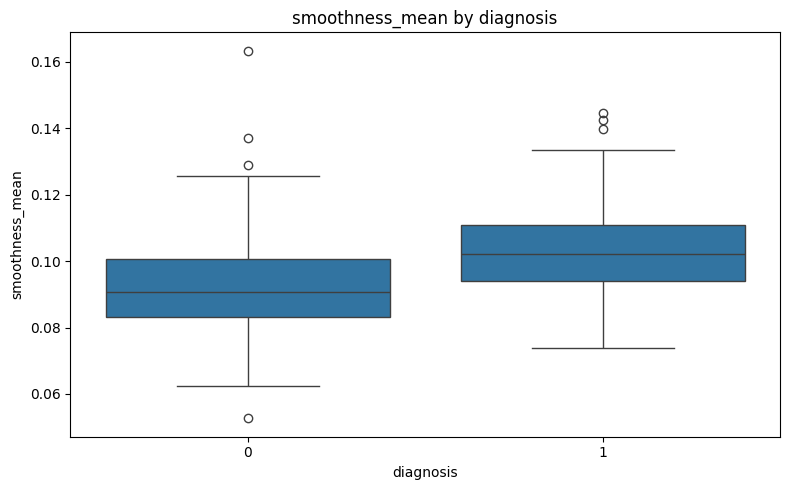

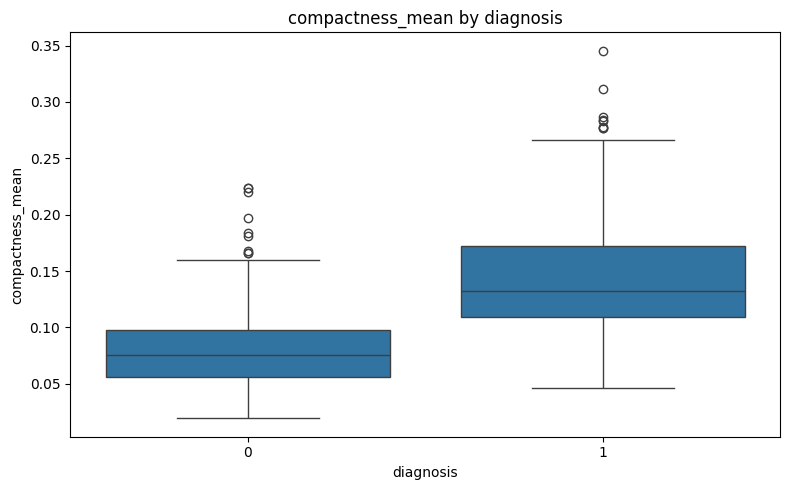

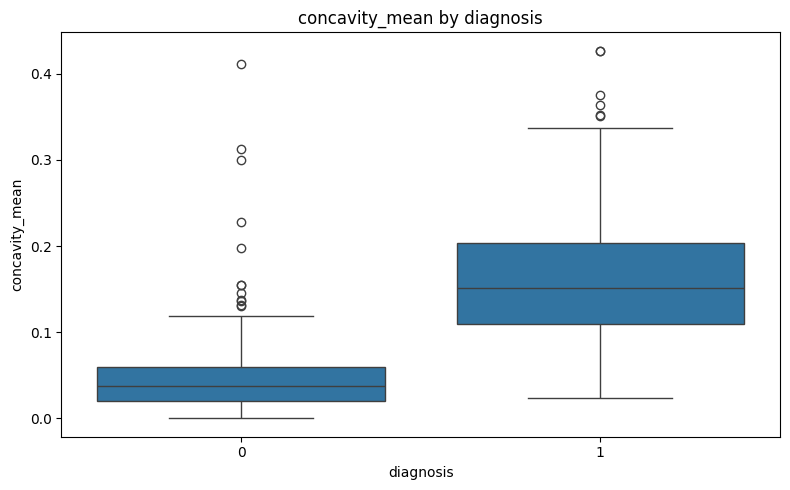

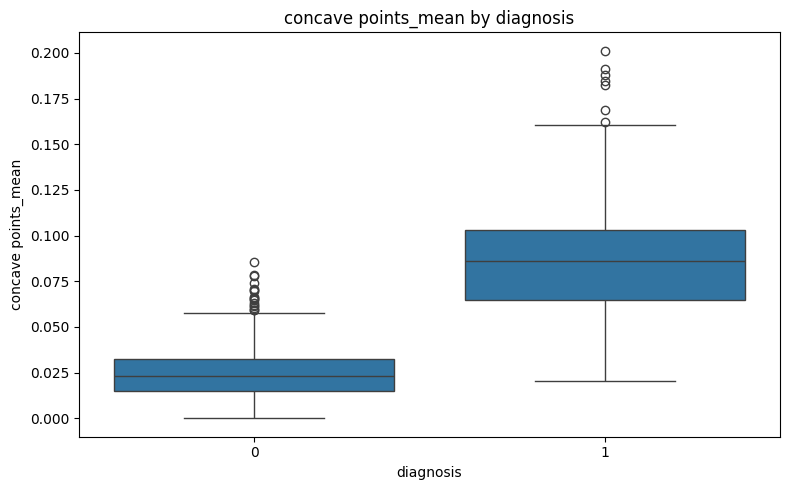

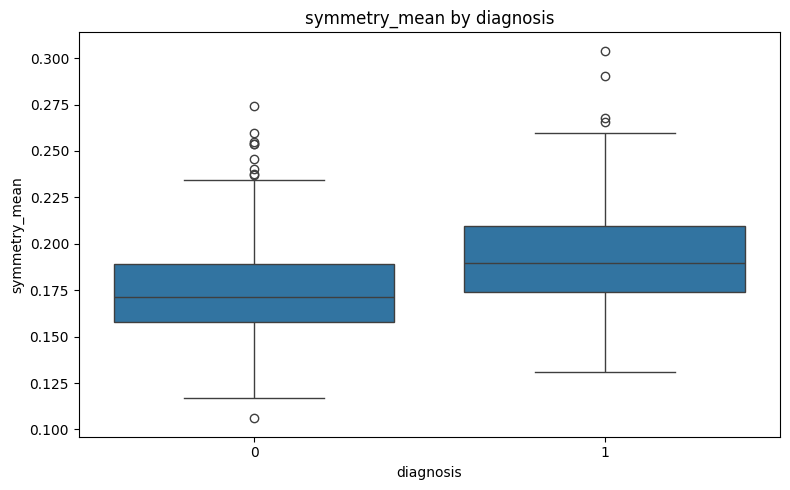

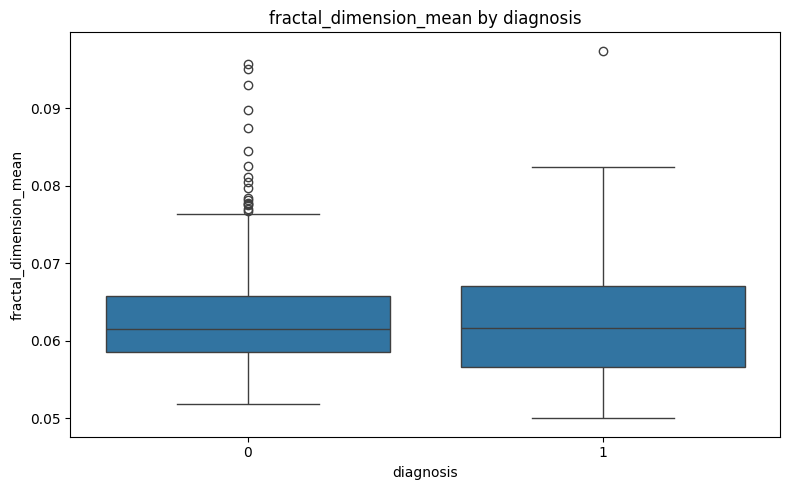

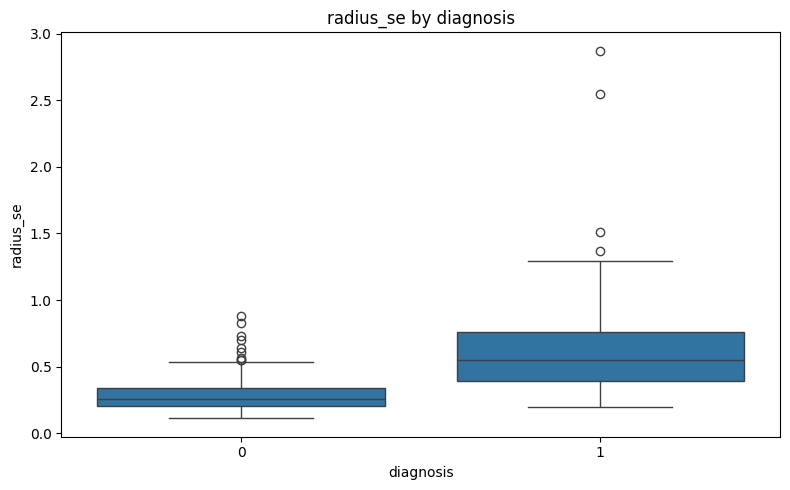

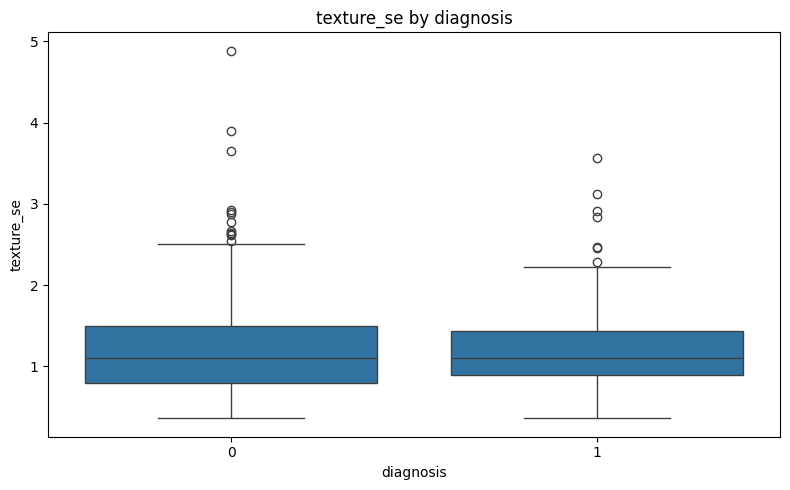

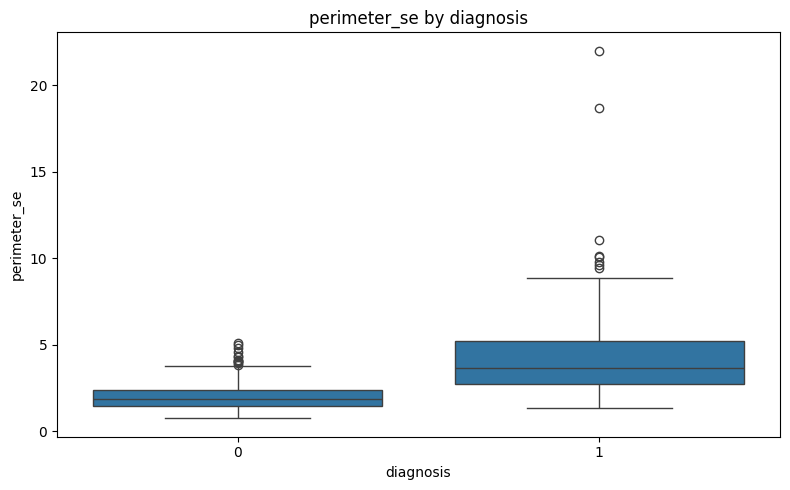

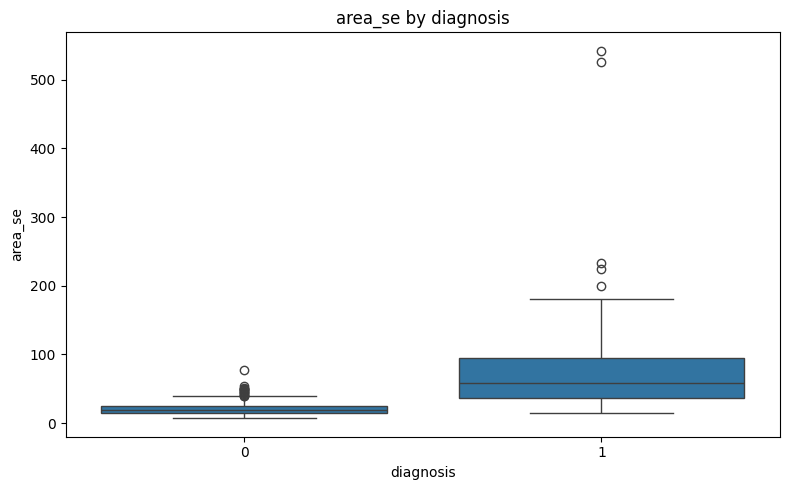

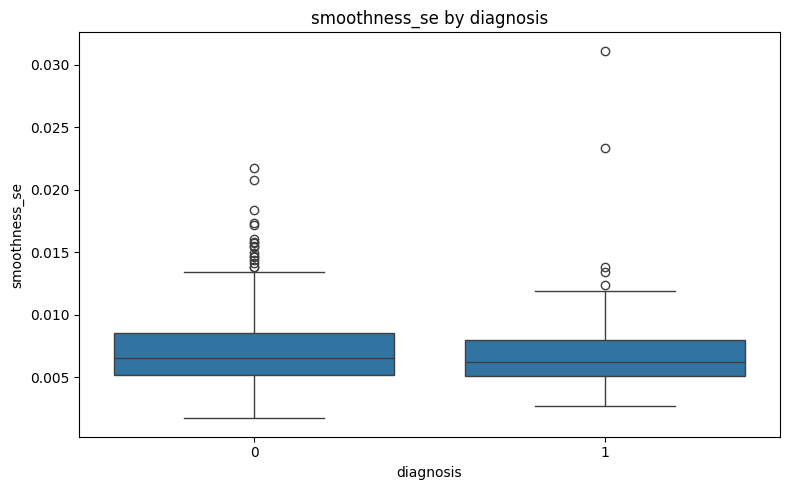

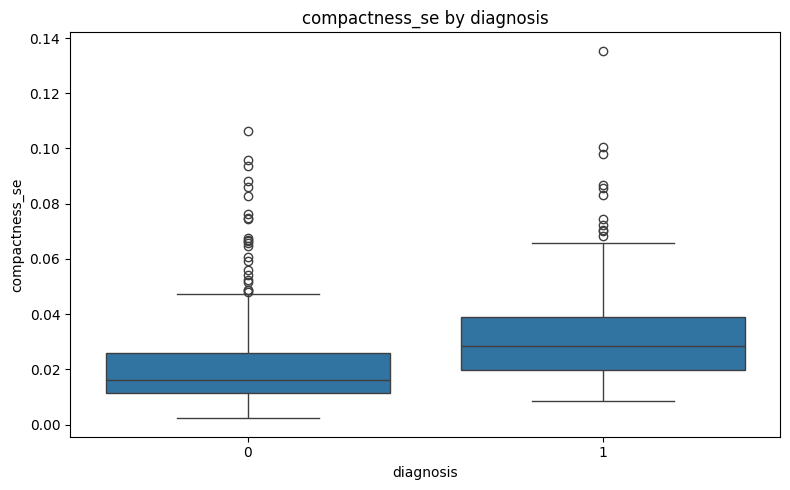

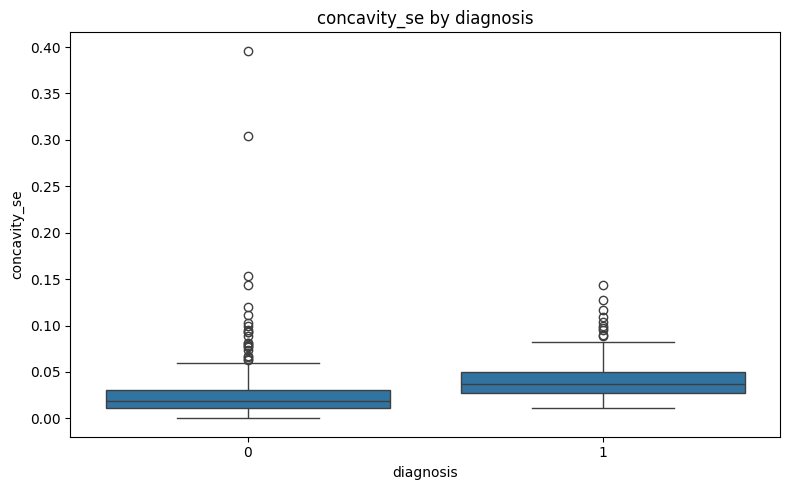

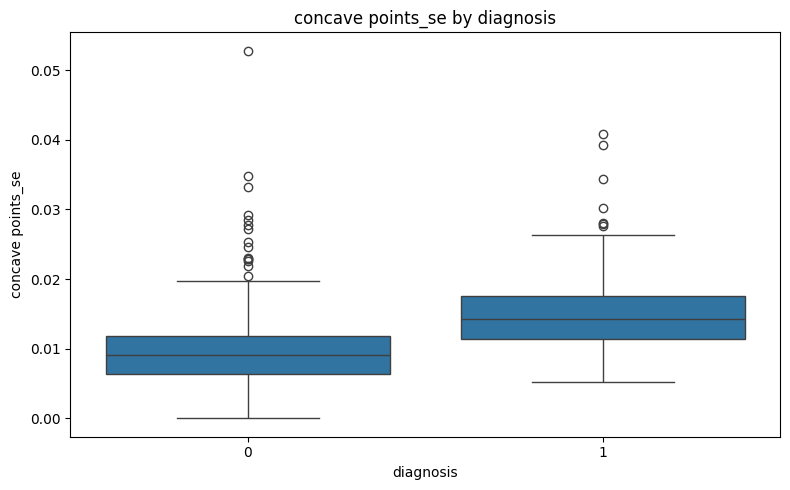

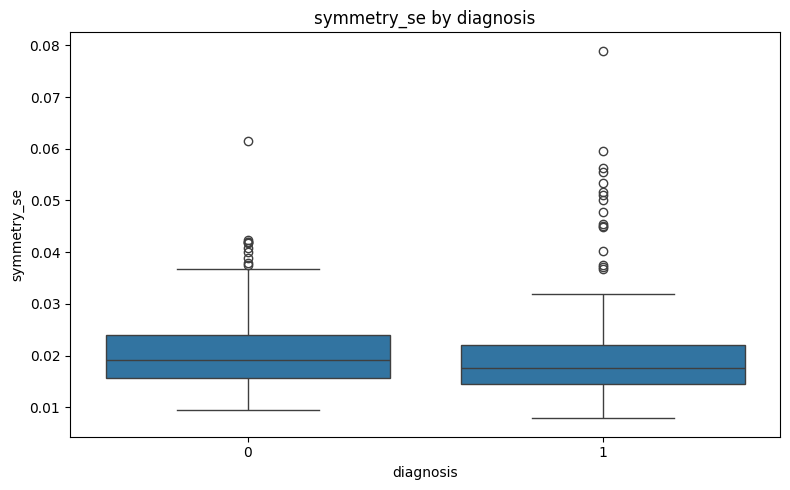

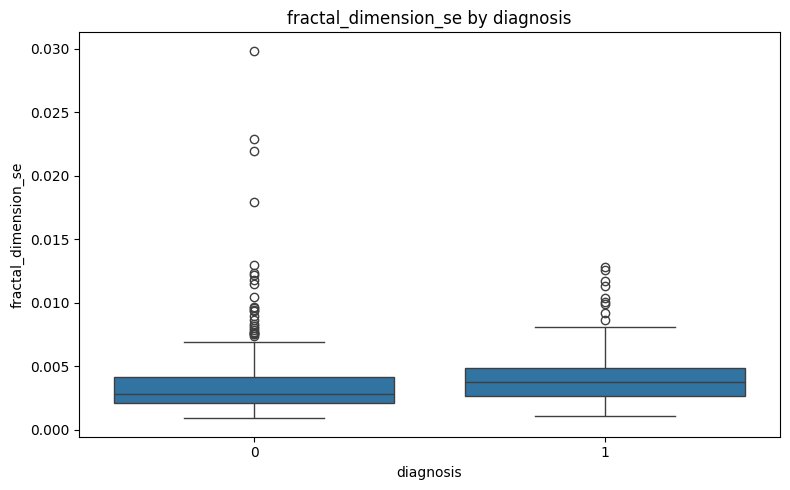

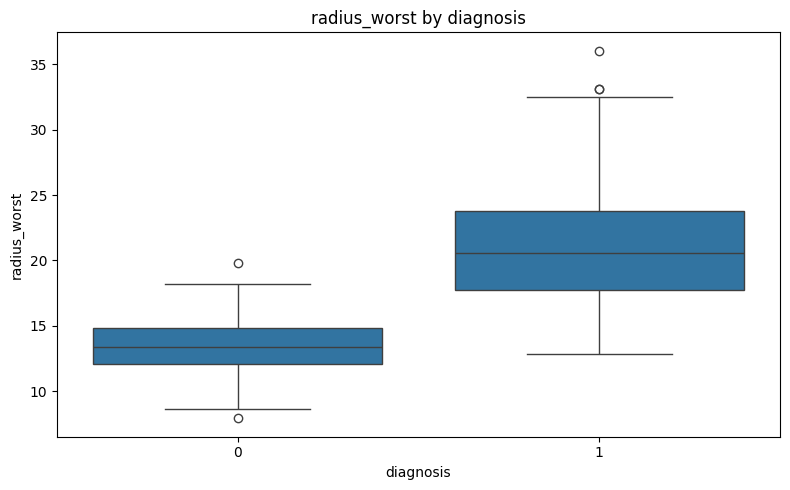

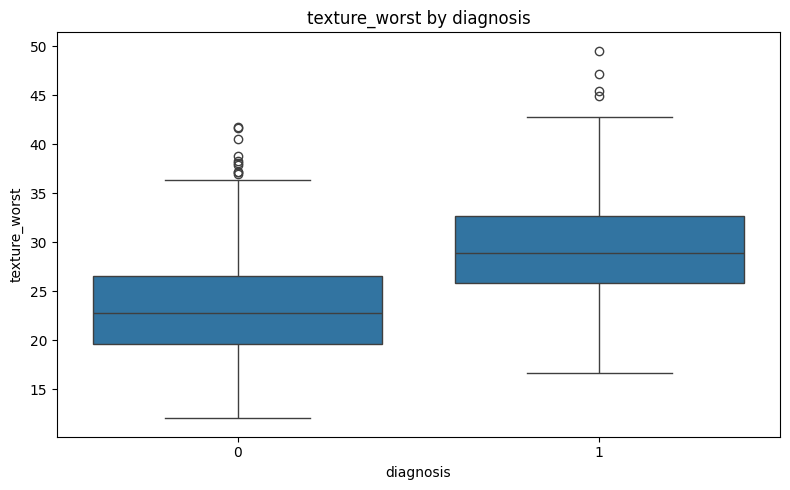

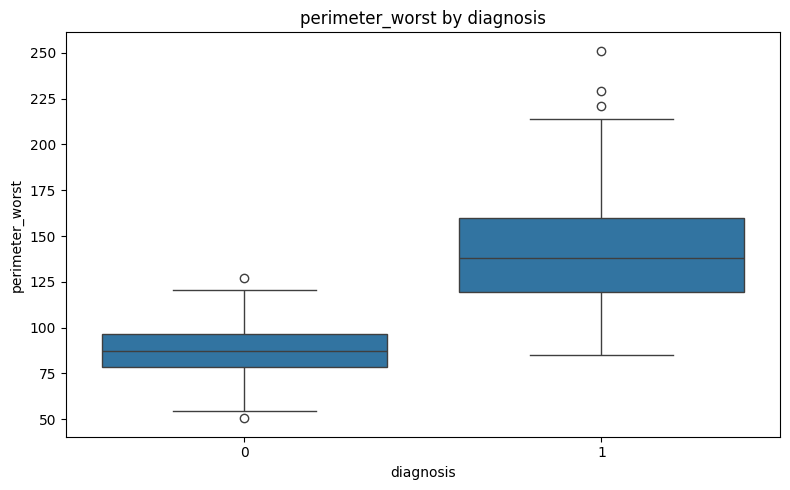

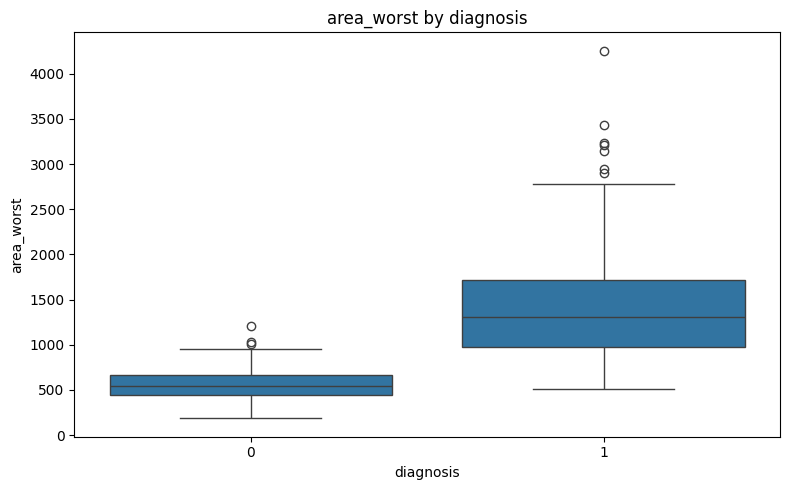

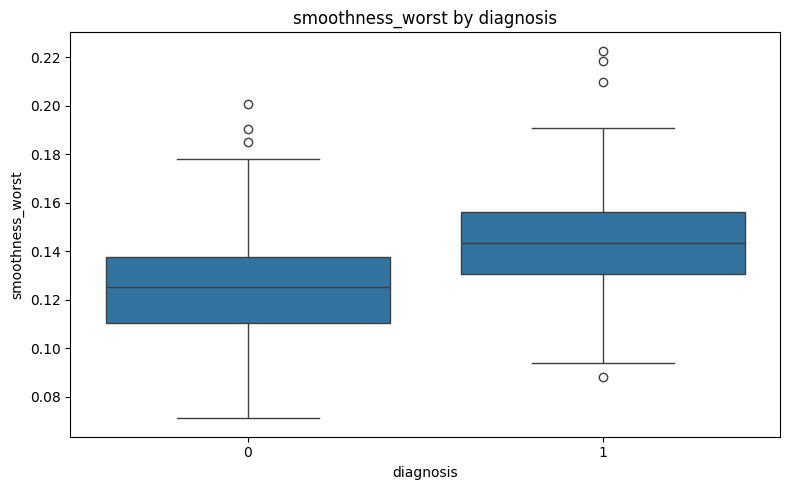

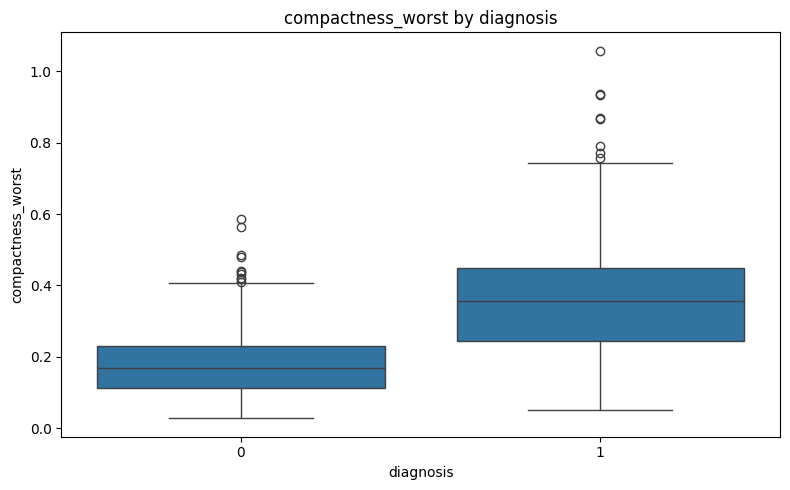

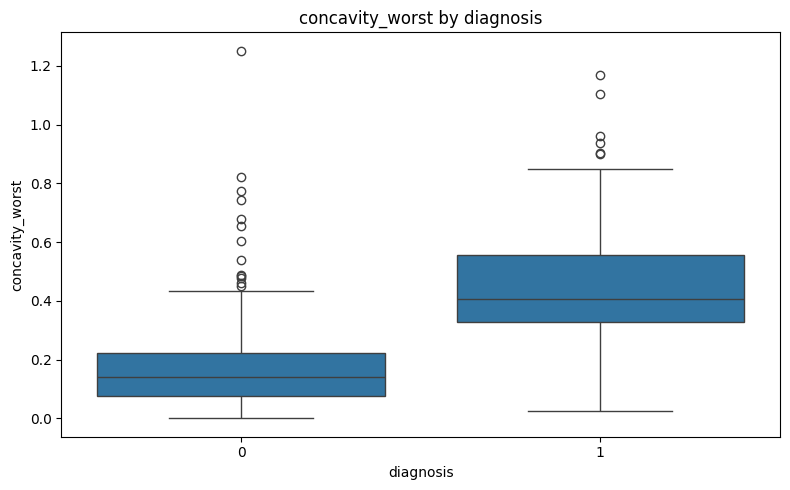

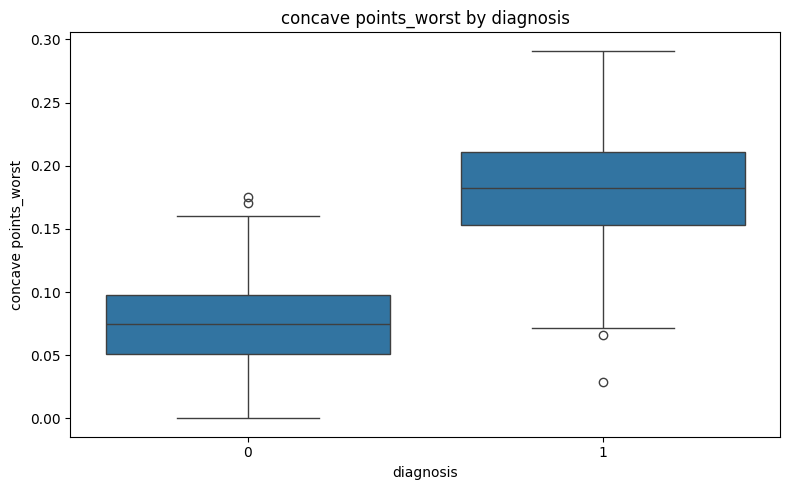

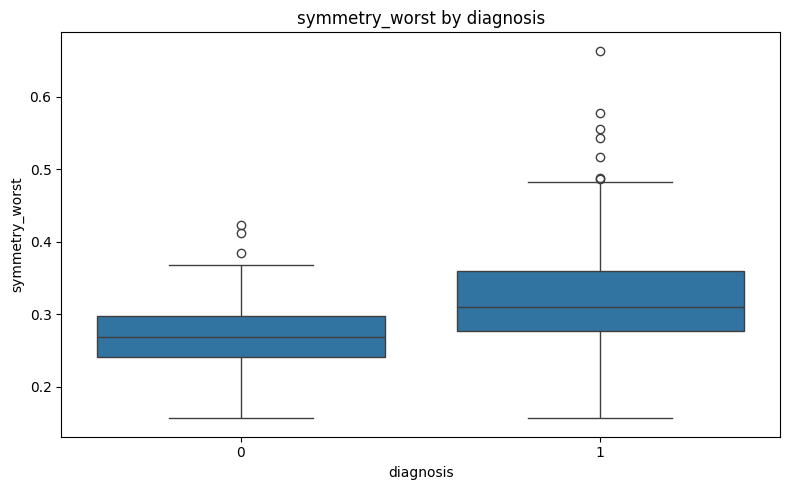

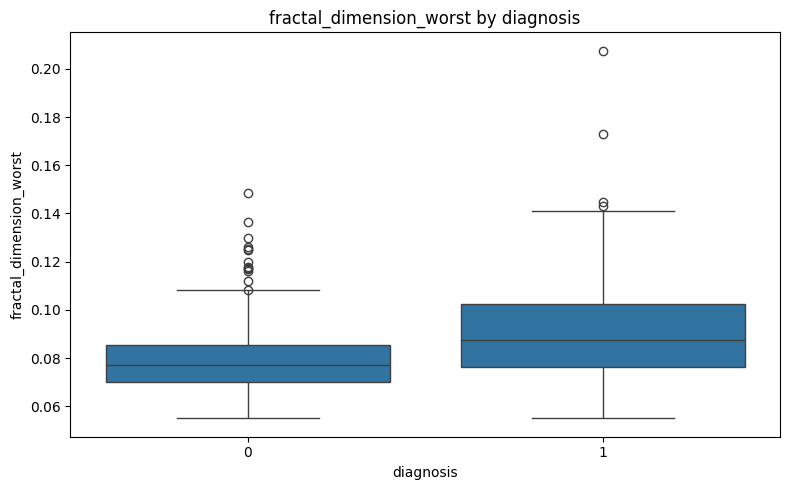

In [23]:
# for column in data.columns:
#     diagnosis_counts.plot(kind = "bar")
#     plt.title( "Counts of each Diagnosis")
#     plt.xlabel("Diagnosis")
#     plt.ylabel("Counts")
#     plt.show()

target = 'diagnosis'  # Replace with your actual target column name

# Get all feature columns (excluding the target)
features = [col for col in data.columns if col != target]

# Create plots for each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=target, y=feature, data=data)
    plt.title(f"{feature} by {target}")
    plt.tight_layout()
    plt.show()